# EDA Facebook Data

Table of Content


1.Problem Statement

* 1.1 Introduction
* 1.2  Data Source and Data Set

2.Load Packages and Data

3.Data Profiling

*  3.1 dtypes
*  3.2 head
*  3.3 describe
*  3.4 sample
*  3.5 pandas profilling
*  3.6 Initial Observations
*  3.7 Final Observations

4.Data Normalisation

*  4.1 Dropping Nan values
*  4.2 Fill Nan values with mode,median and mean
*  4.3 Grouping of Data age with bins

5.Identify Pattern In Data

*   5.1 Frequency Vs Age
*   5.2 Frequency Vs Tenure
*   5.3 Grouping of Age Group (>80 years)
             likes Vs Age
             www_likes Vs Age
             mobile_likes Vs Age
             mobile_likes,www_likes Vs Age
*   5.4 likes Vs Age(all age groups)
             www_likes Vs Age(all age groups)
             mobile_likes Vs Age(all age groups)
*   5.5 pivot graph likes,www,mobile Vs Age
*   5.6 Age Vs Gender
*   5.7 mobile_likes Vs Age
*   5.8 www_likes Vs Gender
*   5.9 likes Vs Gender
*   5.10 Age Vs Gender
*   5.11 pivot table likes,mobile,www Vs Gender

6.Some Validations

*   6.1 likes,mobile_likes and www_likes Vs Age Vs Gender
*   6.2 Tenure Vs Gender
*   6.3 Friend_Count,friendships_initated Vs Gender
*   6.4 Tenure Vs Age
*   6.5 Friend_Count,friendships_initated Vs Age
*   6.6 Convert into likes_per_day 
*   6.7 userid Vs likes per day
*   6.8 likes  Vs Gender 
*   6.9 likes Vs age group

7.Conclusion

8.Actionable Insights
 












     



#  1.Problem Statement


1.1   **INTRODUCTION**

Facebook has become quite popular in the recent few years with people all over the world using it as a medium to share their status,thoughts and pictures with their friends. With the mobile app , it has become even more popular and easier to access. People from all age groups are connected to facebook, however there are certain differences in their way of using it such as with respect to initiating friendships and sending likes . We are trying to study the dataset provided to identify certain patterns with respect to how the users are making use of this most popular social networking app depending on their age group,gender etc.

1.2 **Data Source and Data**

Dataset link : https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv

2.**Load Packages and Data**

In [1]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

from plotly import tools
init_notebook_mode(connected=True)
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



3.**Data Profilling**


In [2]:
df_fb=pd.read_csv("https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv")                             #source fo data
df_fb

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [3]:
df_fb.info()   # display data for each column and their count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [4]:
df_fb.describe()                      # to find quarters,meand and all missing values for each column

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [5]:
df_fb.sample(10)                            #sample data to check for rows and colums

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
59536,1618452,20,9,1993,2,male,481.0,119,46,4,5,4,3,0,2
16087,2018693,31,14,1982,2,male,276.0,18,14,13,7,0,0,13,7
22263,1470340,67,5,1946,10,male,1245.0,26,17,41,4,0,4,41,0
19515,2142557,28,12,1985,12,male,194.0,22,18,34,33,34,29,0,4
53776,2173926,30,11,1983,11,male,687.0,95,17,18,55,15,22,3,33
6286,1054598,36,1,1977,1,male,47.0,4,1,2,1,2,1,0,0
10850,1034075,16,1,1997,1,male,21.0,11,11,0,0,0,0,0,0
22484,1773491,17,30,1996,5,male,512.0,28,24,0,1,0,1,0,0
64315,1719839,26,31,1987,10,male,1222.0,143,28,0,1,0,1,0,0
97480,1298192,99,25,1914,3,male,571.0,1273,937,222,87,222,66,0,21


In [6]:
df_fb.isnull().sum()

userid                   0  
age                      0  
dob_day                  0  
dob_year                 0  
dob_month                0  
gender                   175
tenure                   2  
friend_count             0  
friendships_initiated    0  
likes                    0  
likes_received           0  
mobile_likes             0  
mobile_likes_received    0  
www_likes                0  
www_likes_received       0  
dtype: int64

In [7]:
df_fb.gender.unique()

array(['male', 'female', nan], dtype=object)

In [8]:
minimum=df_fb['age'].min()                            # find maximim and minimum age
maximum=df_fb['age'].max()
print(minimum)
print(maximum)
df_fb[df_fb['age']>70].shape[0]

13
113


7972

3.6 **Initial Observations**



*   the value for gender is missing -175
*   Tenure is also having two values missing
*   There are some values missing in gender have three unique values -male,female and nan
*   user id is  7 digits unique integr
*   maximium value of age is 113 and mimimum is 13 and there are 7972 rows with age greater then 70
*   







3.7
**Pandas** **Profliling**

In [9]:
import pandas_profiling                                # pandas profiling used to check for every column in detail
!pip install -U pandas pandas_profiling

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.2)
Requirement already up-to-date: pandas_profiling in /usr/local/lib/python3.6/dist-packages (2.9.0)


In [10]:
profile=df_fb.profile_report(title="Facebook Data showing variables")
profile.to_file("Facebook_Data_Sheet.html")

4 .**Data Normalisation**

**4.1 Dropping Nan values**

In [11]:
#counting all values here for column gender

df_fb['gender'].value_counts(dropna=False)

male      58574
female    40254
NaN       175  
Name: gender, dtype: int64

Text(0.5, 1.0, 'Distribution of Female and Male in %')

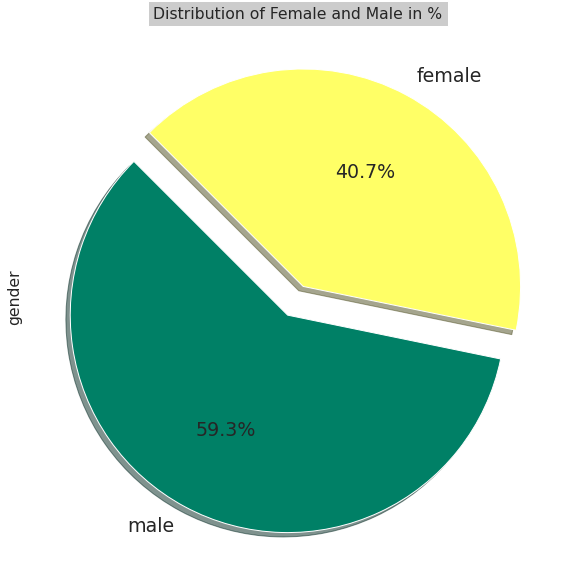

In [12]:
# See ratio of male and female by pie chart
df_fb['gender'].value_counts().plot(kind='pie', explode=[0.1,0.05], fontsize=19, autopct='%3.1f%%', 
                                               figsize=(20,10), shadow=True, startangle=135,  cmap='summer')
plt.title("Distribution of Female and Male in %", bbox={'facecolor':'0.8', 'pad':5})

**4.2 Filling Nan values with mode**

In [13]:
#replace Nan is gender colums by mode
df_fb['gender']=df_fb['gender'].fillna(df_fb['gender'].mode()[0])
df_fb['gender'].unique()

array(['male', 'female'], dtype=object)

In [14]:
#will  check for unique values in age column
df_fb['age'].nunique()

101

**5.Indentify Patterns In Data**


*   **a)Frequency Vs Age**




Text(0.5, 1.0, 'Frequecy Vs Age')

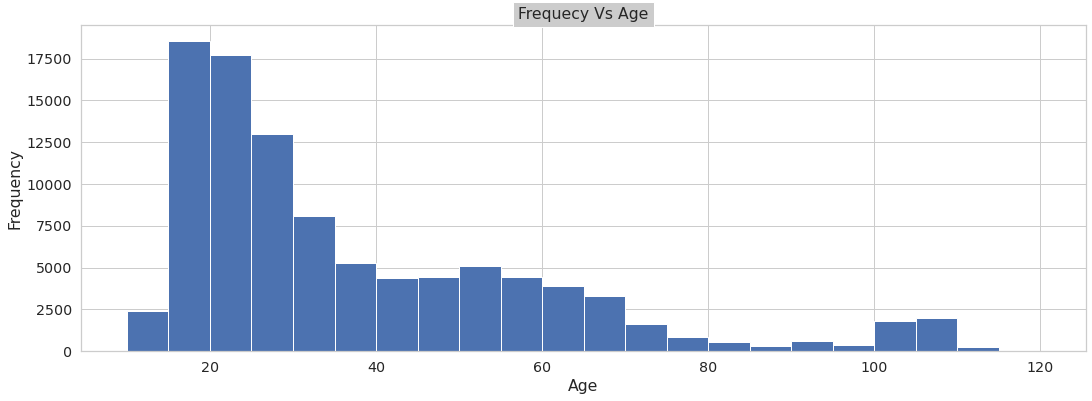

In [15]:
# histogram plot with frequecy at age groups 
plt.figure(figsize=(18,6))
bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]
df_fb['age'].plot.hist(bins=bins)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Frequecy Vs Age",bbox={'facecolor':'0.8', 'pad':5})

**5b) Frequecy Vs Age**

Text(0.5, 1.0, 'Frequecy Vs Age')

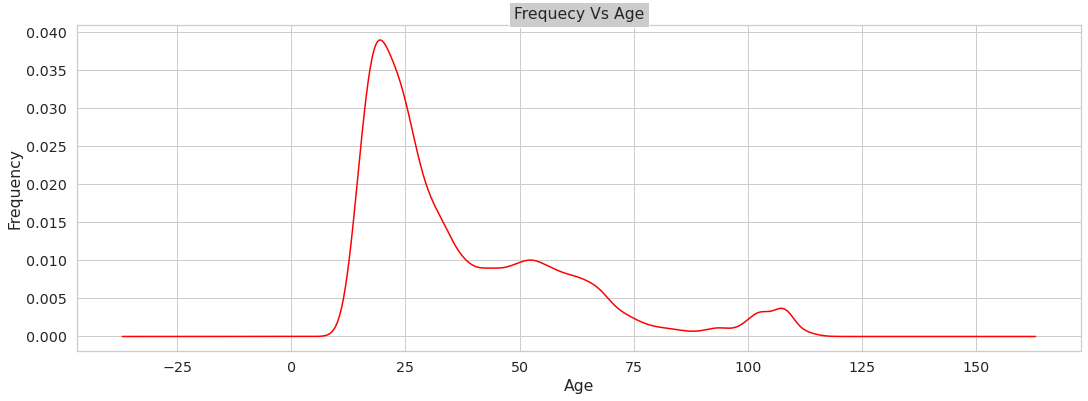

In [16]:
plt.figure(figsize=(18,6))
df_fb['age'].plot(kind='density',color='Red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Frequecy Vs Age", bbox={'facecolor':'0.8', 'pad':5})

#Observations:
The above two Graphs shows that the people having Age between 15 to 25 have more frequecy or more data as compared to other age groups ,also one thing to note there is data in terms of fb activeness like www_likes,mobile_likes and all are having records with more then 100 years of age

In [17]:
#If any colum is having null value wil return True
df_fb.isnull().values.any()

True

In [18]:
#Display the rows having tenure as Nan in data along with all columns
print(df_fb[df_fb['tenure'].isnull()])

        userid  age  dob_day  dob_year  dob_month  gender  tenure  \
35057  1414063  88   14       1925      12         female NaN       
63979  2095829  103  1        1910      1          female NaN       

       friend_count  friendships_initiated  likes  likes_received  \
35057  48            41                     18     5                
63979  137           52                     110    74               

       mobile_likes  mobile_likes_received  www_likes  www_likes_received  
35057  17            3                      1          2                   
63979  0             21                     110        53                  


In [19]:
#droppping the twi values in tenure columns which has nan values
df_fb=df_fb.dropna()

In [20]:
# diplay if still there is null value
df_fb.isnull().sum().any()

False

Text(0.5, 1.0, 'Frequecy Vs Tenure')

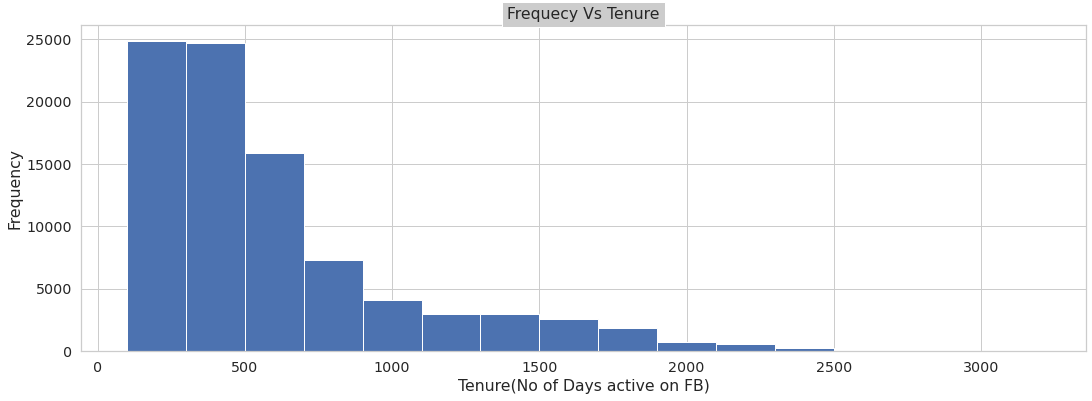

In [21]:
#histogram chart showing the frequecny of users Vs the time period with FB
plt.figure(figsize=(18,6))
bins=[100,300,500,700,900,1100,1300,1500,1700,1900,2100,2300,2500,2700,2900,3100,3200]
df_fb['tenure'].plot.hist(bins=bins)
plt.xlabel('Tenure(No of Days active on FB)')
plt.ylabel('Frequency')
plt.title("Frequecy Vs Tenure", bbox={'facecolor':'0.8', 'pad':5})

**5.2 Frequency Vs Tenure**

Text(0.5, 1.0, 'Frequecy Vs Tenure')

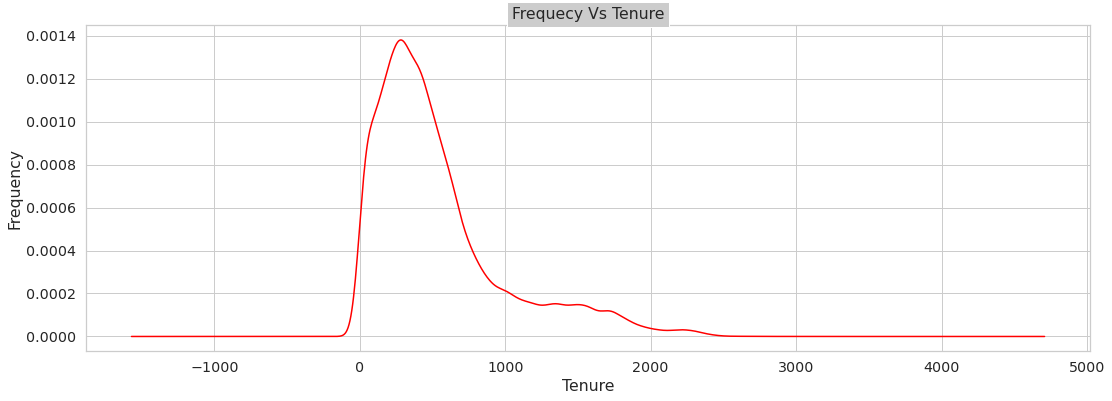

In [22]:
plt.figure(figsize=(18,6))
df_fb['tenure'].plot(kind='density',color='Red')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title("Frequecy Vs Tenure", bbox={'facecolor':'0.8', 'pad':5})

In [23]:
#count of users having spent more then 8 years
b=df_fb.loc[df_fb['tenure']>=3000].shape[0]
c=df_fb.loc[(df_fb['tenure']>0) & (df_fb['tenure']<=1500)].shape[0]
print("There are Total {} Users having tenure more then 3000 ".format(b))
print("There are Total {} Users having Tenure between 0 to 1500 which is ({:.1%})  of total users ".format(c,(c/df_fb['tenure'].shape[0])))

There are Total 7 Users having tenure more then 3000 
There are Total 92899 Users having Tenure between 0 to 1500 which is (93.8%)  of total users 


**4.3 Grouping of age into bins**

In [24]:
#will divide age into another colums as bins
df_fb['age1'] = pd.cut(df_fb['age'].dropna(),
                         [0,30,45,60,90,115], labels=['<30','31-45','46-59','60-89','90-115'], include_lowest=True,right=True)

In [25]:
# total counts age wise
df_fb['age1'].value_counts()

<30       53398
31-45     16893
46-59     13885
60-89     9920 
90-115    4905 
Name: age1, dtype: int64

**5.3 Grouping of age group >80 years**

In [26]:
#since we have some age more then 80 so need to check what percentage is from total also it has data or not whether they are active on FB or not
age_max=df_fb['age'].max()
age_min=df_fb['age'].min()
s=df_fb['age'].mode()
print("the maximum age is", age_max)
print("the minimum age is",age_min)
print("the maximim age group is  ",s)
c=df_fb.loc[(df_fb['age']>=13) & (df_fb['age']<=80)].shape[0]
d=df_fb.loc[(df_fb['age']>80) & (df_fb['age']<=113)].shape[0]
print(c)
print(d)
print("out of {} of records the {}  is having age greater then 80 years which is around({:.1%})  ".format(df_fb['age'].shape[0],d,(d/df_fb['age'].shape[0])))

the maximum age is 113
the minimum age is 13
the maximim age group is   0    18
dtype: int64
93280
5721
out of 99001 of records the 5721  is having age greater then 80 years which is around(5.8%)  


In [27]:
#Also need to check are they active or not
# will make another Data Frame with age more then 80 and check for their contribution on FB in terms of likes,www_likes,mobile_likes

df_more_age=df_fb.loc[(df_fb['age']>80) & (df_fb['age']<=113)]

In [28]:
# Total count of likes,www_likes and mobile_likes in age group more then 80 years 
df_more_age[['age','likes','www_likes','friendships_initiated','mobile_likes']].sort_values(ascending=False,by='mobile_likes')

,age,likes,www_likes,friendships_initiated,mobile_likes
53144,91,11122,185,9,10937
97987,101,11696,1781,545,9915
96987,103,8963,216,642,8747
98003,103,7674,0,898,7674
97988,108,5208,282,97,4926
...,...,...,...,...,...
85233,108,2,2,306,0
85189,108,1,1,70,0
85176,88,1,1,310,0
85170,108,0,0,79,0


**likes Vs Age**

Text(0.5, 1.0, 'likes Vs Age')

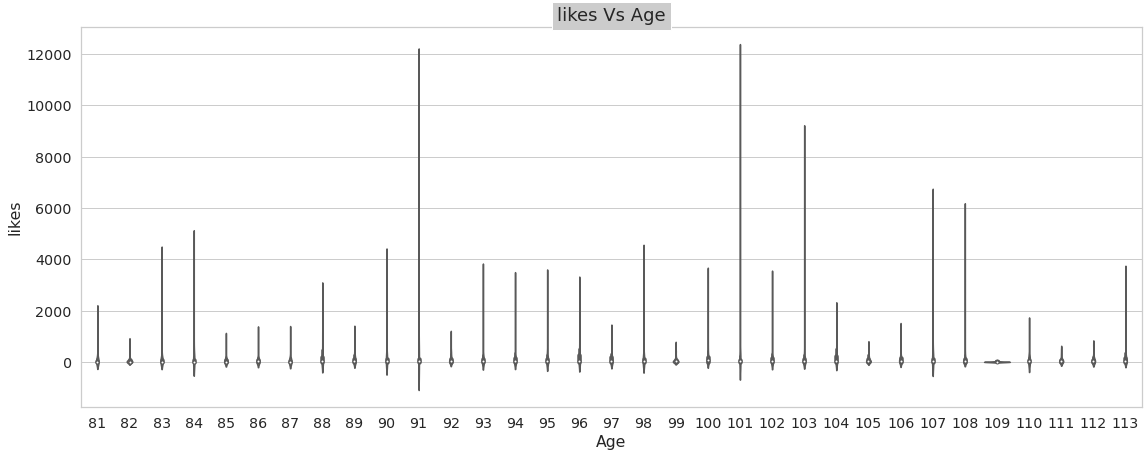

In [29]:
plt.figure(figsize=(19,7))                        # violin part comparing the likes Vs age (more then 80 years of age)
ax=sns.violinplot(y='likes' ,x='age',gridsize=100,data=df_more_age,palette='Set2',color='matplotlib')
plt.xlabel("Age")
plt.ylabel("likes")
plt.title("likes Vs Age",fontsize=18, bbox={'facecolor':'0.8', 'pad':5})

**www_likes Vs Age**

Text(0.5, 1.0, 'www_likes age wise')

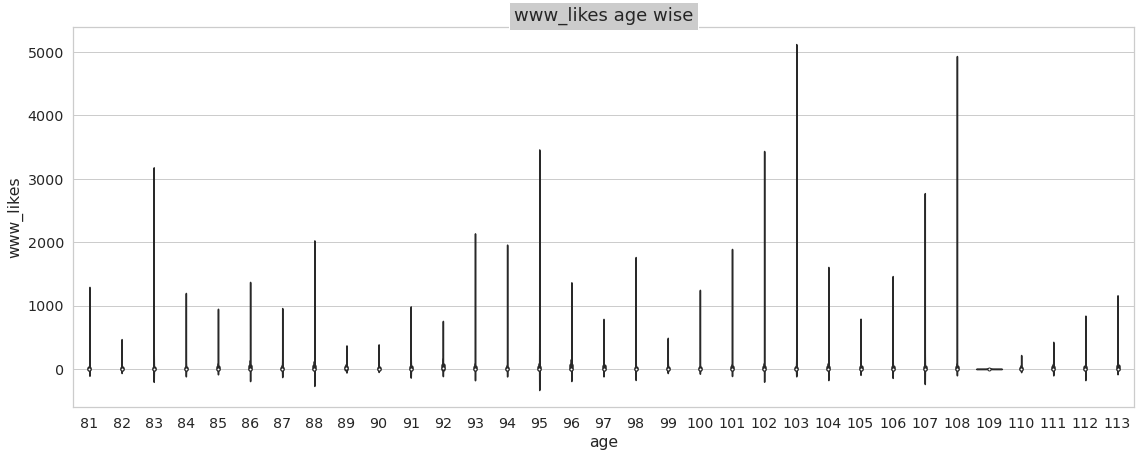

In [30]:
plt.figure(figsize=(19,7))     # violin part comparing the www_likes Vs age (more then 80 years of age)
ax=sns.violinplot(y='www_likes' ,x='age',gridsize=100,data=df_more_age,palette='Purples',color='matplotlib')
plt.xlabel("age")
plt.ylabel("www_likes")
plt.title("www_likes age wise",fontsize=18, bbox={'facecolor':'0.8', 'pad':5})

**mobile_likes Vs Age**

Text(0.5, 1.0, 'mobile_likes age wise')

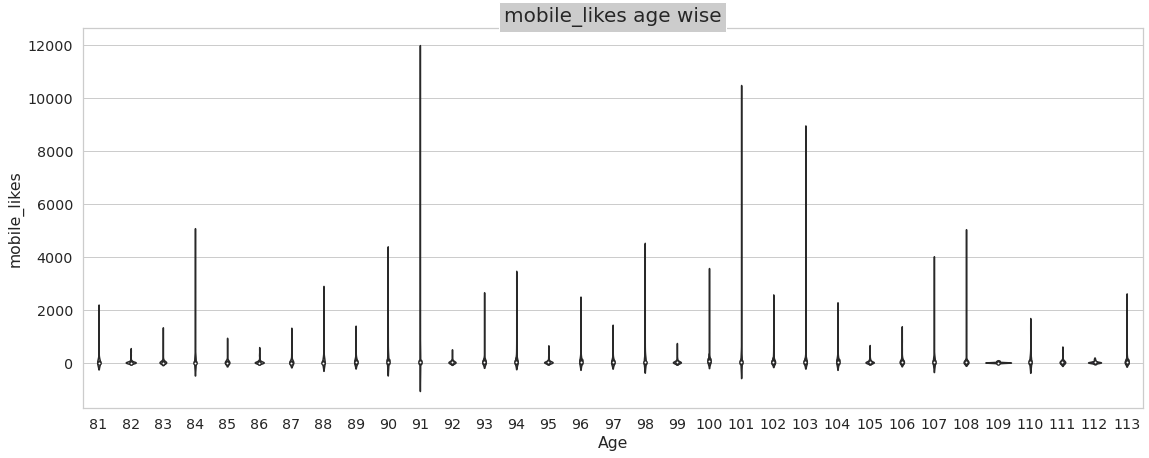

In [31]:
plt.figure(figsize=(19,7))       # violin part comparing the mobile_likes Vs age (more then 80 years of age)
bins=[-100,0,100,300,500,700,900,1100,1300,1500,2000]
ax=sns.violinplot(y='mobile_likes' ,x='age',gridsize=100,data=df_more_age,palette='Purples',color='matplotlib',bins=bins)
plt.xlabel("Age")
plt.ylabel("mobile_likes")
plt.title("mobile_likes age wise",fontsize=20, bbox={'facecolor':'0.8', 'pad':5})

# Observation for age group more then 80 years in terms of likes 
Above Graphs shows that users more then 80 years are also active as per likes,mobile_likes,www_likes so we cant drop these rows

**www_likes ,mobile_likes Vs Age**

Text(0.5, 1.0, 'mobile_likes ,www_likes Vs age')

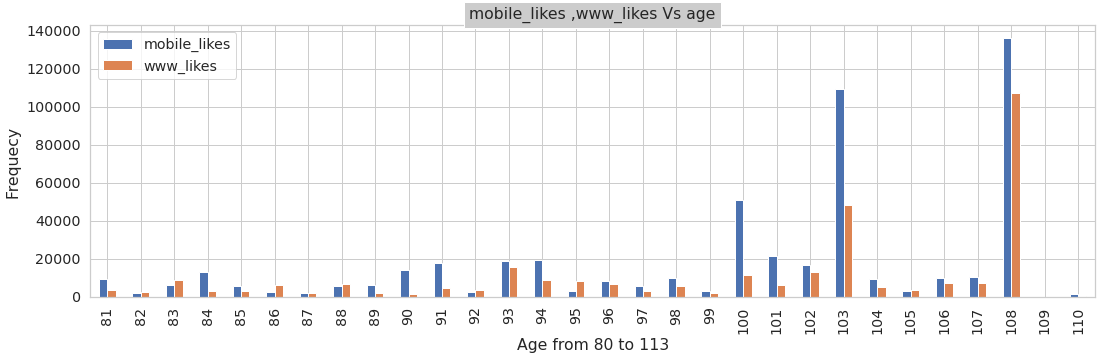

In [32]:
# comparing number of www_likes ,mobile_likes with respect to age 
df_more_age.groupby('age')['mobile_likes','www_likes'].sum()[:30].plot(kind='bar',figsize=(18,5))
plt.xlabel('Age from 80 to 113')
plt.ylabel("Frequecy ")
plt.title("mobile_likes ,www_likes Vs age" ,bbox={'facecolor':'0.8', 'pad':5})

Text(0.5, 1.0, 'Frequecy Vs User id')

<Figure size 1296x432 with 0 Axes>

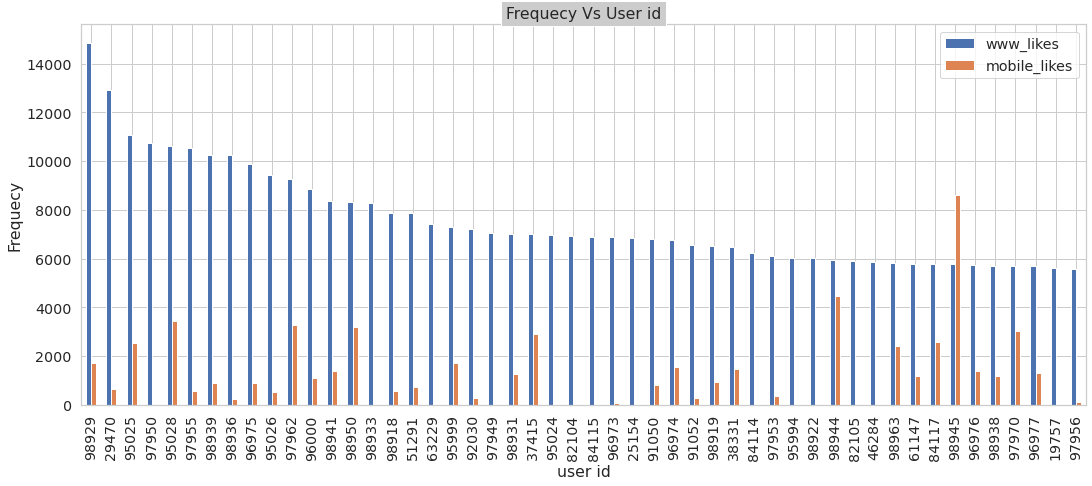

In [33]:
plt.figure(figsize=(18,6))    #comparing number of www_likes ,mobile_likes with respect to age greater then 13
df_fb.loc[df_fb['age']>13][['www_likes','mobile_likes']].sort_values(ascending=False,by='www_likes')[:50].plot(kind='bar',figsize=(18,7))
plt.xlabel("user id")
plt.ylabel("Frequecy")
plt.title("Frequecy Vs User id",bbox={'facecolor':'0.8', 'pad':5})


#Observations
By two above Graphs we can say that users use FB more frequect  by mobile as mobile likes are more as compare to web likes

**5.4 likes Vs Age all age groups**

Text(0.5, 1.0, 'likes Vs Age Group')

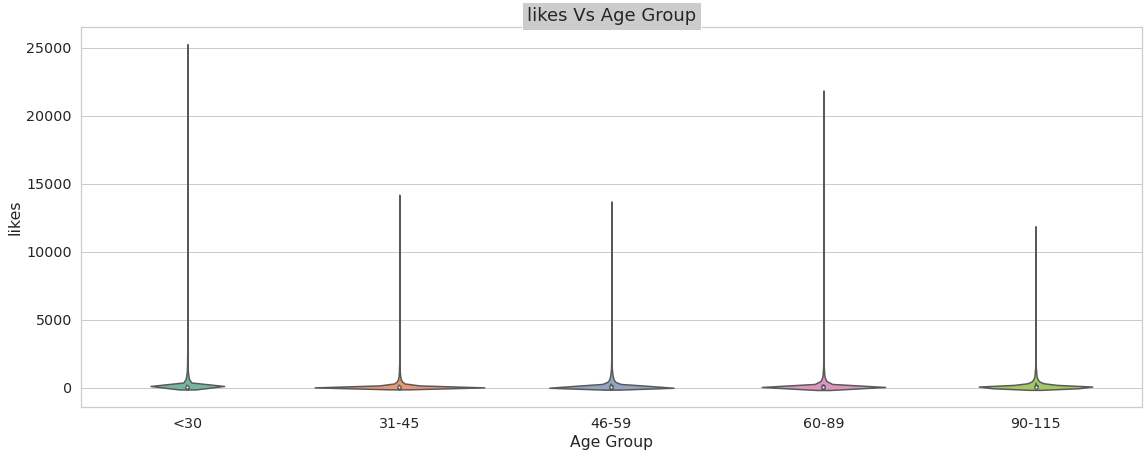

In [34]:
# plot showing comaprision of likes Vs different age groups
plt.figure(figsize=(19,7))
ax=sns.violinplot(y='likes' ,x='age1',gridsize=100,data=df_fb,palette='Set2',color='matplotlib')
plt.xlabel("Age Group")
plt.ylabel("likes")
plt.title("likes Vs Age Group",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

**www_likes Vs Age(all age groups)**

Text(0.5, 1.0, 'www_likes Vs Age Group')

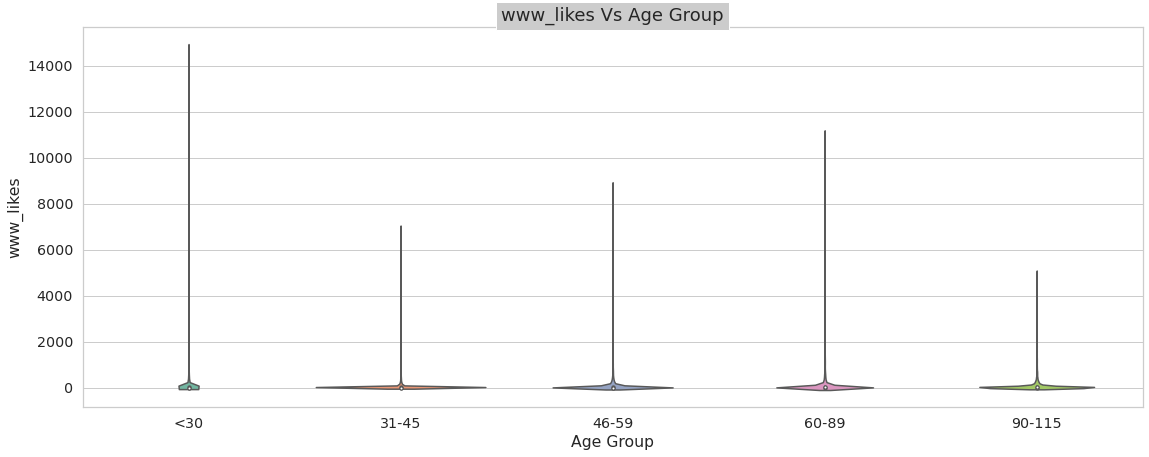

In [35]:
# plot showing comaprision of www_likes Vs different age groups

plt.figure(figsize=(19,7))
ax=sns.violinplot(y='www_likes' ,x='age1',gridsize=100,data=df_fb,palette='Set2',color='matplotlib')
plt.xlabel("Age Group")
plt.ylabel("www_likes")
plt.title("www_likes Vs Age Group",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

**mobile_likes Vs Age(all age groups)**

Text(0.5, 1.0, 'mobile_likes Vs Age Group')

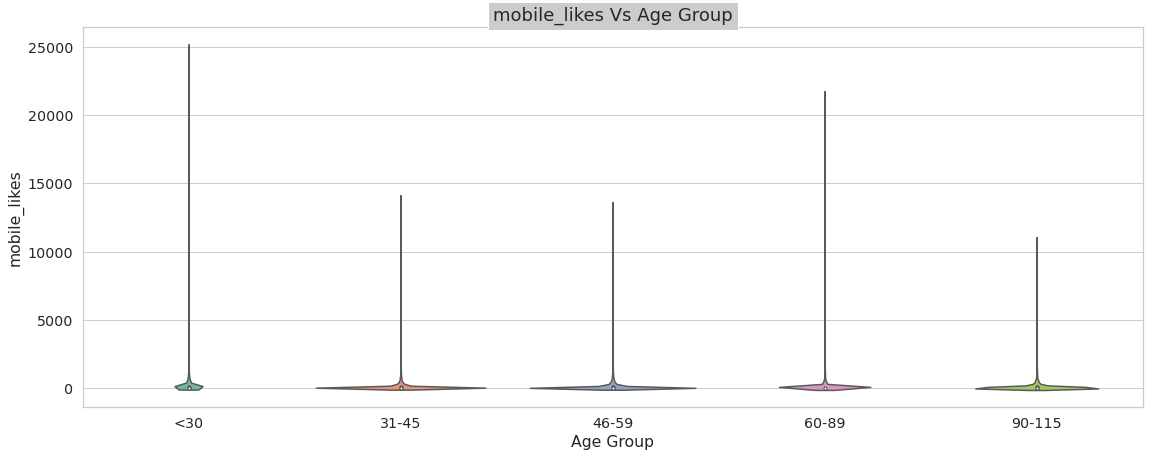

In [36]:
# plot showing comaprision of mobile_likes Vs different age groups
plt.figure(figsize=(19,7))
ax=sns.violinplot(y='mobile_likes' ,x='age1',gridsize=100,data=df_fb,palette='Set2',color='matplotlib')
plt.xlabel("Age Group")
plt.ylabel("mobile_likes")
plt.title("mobile_likes Vs Age Group",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

In [37]:
#will make data set according to the age group and see which has more likes,www_likes and mobile_likes
#one dta set we have already from age group more then 80 and 

df_age_0_to_30=df_fb.loc[(df_fb['age']>0) & (df_fb['age']<=30)].shape[0]
df_age_31_to_45=df_fb.loc[(df_fb['age']>30) & (df_fb['age']<=45)]
df_age_46_to_59=df_fb.loc[(df_fb['age']>45) & (df_fb['age']<=59)]
df_age_60_to_89=df_fb.loc[(df_fb['age']>60) & (df_fb['age']<=89)]
df_age_90_to_115=df_fb.loc[(df_fb['age']>90) & (df_fb['age']<115)]
print("age1  ddddd",df_age_0_to_30)
print(df_age_31_to_45)
print(df_age_46_to_59)
print(df_age_60_to_89)
print(df_age_90_to_115)

age1  ddddd 53398
        userid  age  dob_day  dob_year  dob_month  gender  tenure  \
947    1337980  31   24       1982      11         female  353.0    
948    1030633  31   14       1982      11         male    128.0    
949    1094447  31   17       1982      11         male    94.0     
950    2115643  31   26       1982      11         male    0.0      
951    1584181  31   6        1982      12         male    280.0    
...        ...  ..  ..         ...      ..          ...      ...    
98946  1269167  31   30       1982      4          male    513.0    
98947  1856665  34   22       1979      11         male    392.0    
98958  1070396  37   29       1976      2          female  878.0    
98974  1686646  43   1        1970      1          male    793.0    
99002  1397896  39   15       1974      5          female  397.0    

       friend_count  friendships_initiated  likes  likes_received  \
947    0             0                      0      0                
948    0       

Total number of likes ,www_likes and mobile_likes of age group less then 30 are as under:

likes           8583879
www_likes       2535481
mobile_likes    6048395
dtype: int64


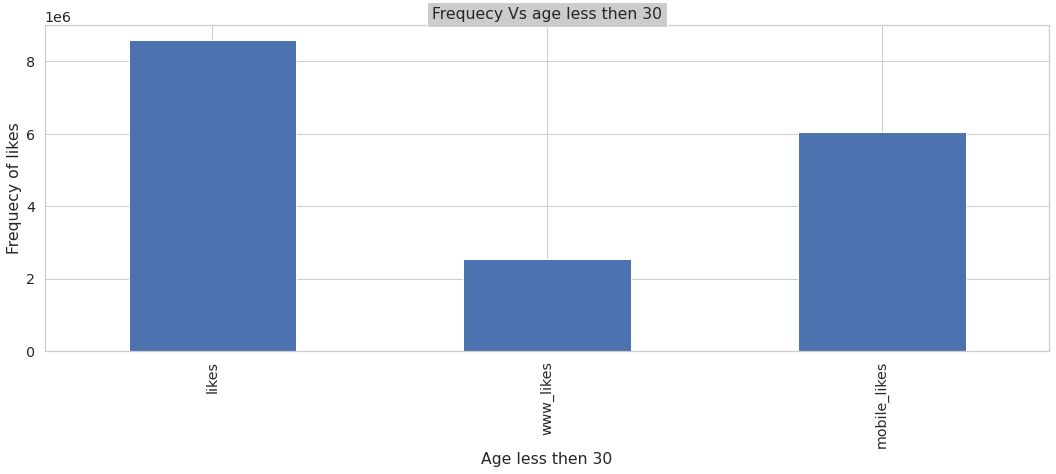

In [38]:
#Plot showing likes,www_likes and mobile_likes compared to age group less then 30 years of age
plt.figure(figsize=(18,6))
sum_of_likes=df_fb.loc[df_fb['age']<30][['likes','www_likes','mobile_likes']].sum().plot(kind='bar')
plt.xlabel("Age less then 30")
plt.ylabel("Frequecy of likes")
plt.title("Frequecy Vs age less then 30",bbox={'facecolor':'0.8', 'pad':5})
sum_of_likes_0=df_fb.loc[df_fb['age']<30][['likes','www_likes','mobile_likes']].sum()
print("Total number of likes ,www_likes and mobile_likes of age group less then 30 are as under:")
print()
print(sum_of_likes_0)


Total number of likes ,www_likes and mobile_likes of age group 30 to 60 are as under:

likes           4504110
www_likes       1352176
mobile_likes    3151931
dtype: int64


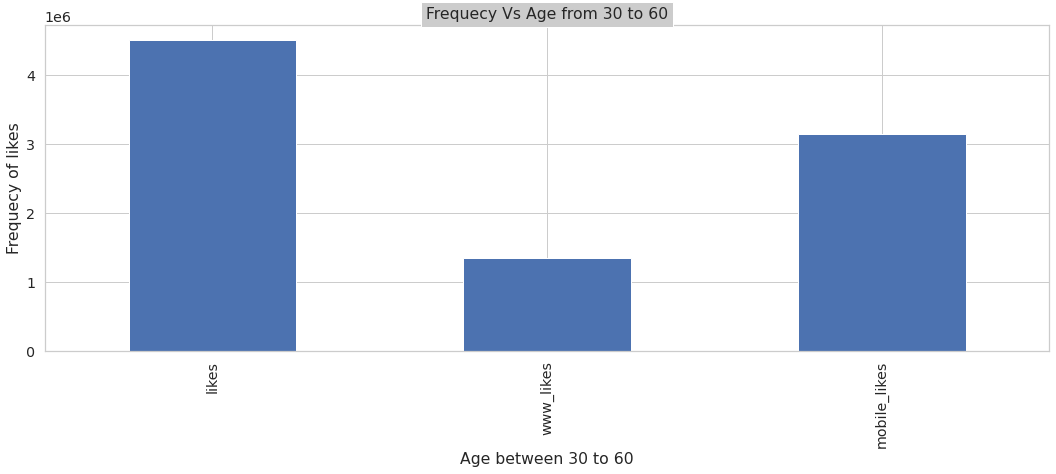

In [39]:
#Plot showing likes,www_likes and mobile_likes compared to age group greater then 30 and less then 60 years of age
plt.figure(figsize=(18,6))
sum_of_likes1=df_fb.loc[(df_fb['age']>=30) & (df_fb['age']<60)][['likes','www_likes','mobile_likes']].sum().plot(kind='bar')
plt.xlabel("Age between 30 to 60")
plt.ylabel("Frequecy of likes")
plt.title("Frequecy Vs Age from 30 to 60",bbox={'facecolor':'0.8', 'pad':5})
print("Total number of likes ,www_likes and mobile_likes of age group 30 to 60 are as under:")
print()
sum_of_likes_1=df_fb.loc[(df_fb['age']>=30) & (df_fb['age']<60)][['likes','www_likes','mobile_likes']].sum()
print(sum_of_likes_1)


Total number of likes ,www_likes and mobile_likes of age group 60 to 90 are as under:

likes           1591543
www_likes       776334 
mobile_likes    815209 
dtype: int64


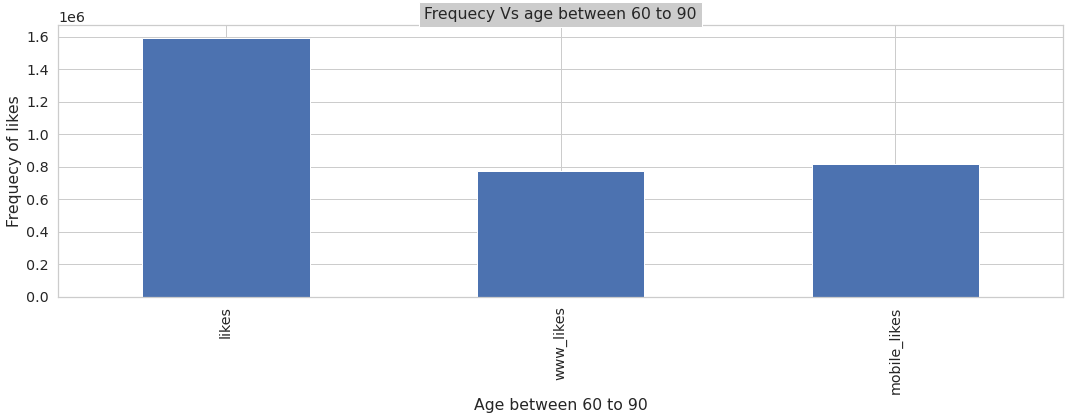

In [40]:
#Plot showing likes,www_likes and mobile_likes compared to age group greater then 60 and less then 90 years of age
plt.figure(figsize=(18,5))
sum_of_likes2=df_fb.loc[(df_fb['age']>=60) & (df_fb['age']<90)][['likes','www_likes','mobile_likes']].sum().plot(kind='bar')
sum_of_likes_2=df_fb.loc[(df_fb['age']>=60) & (df_fb['age']<90)][['likes','www_likes','mobile_likes']].sum()
plt.xlabel("Age between 60 to 90")
plt.ylabel("Frequecy of likes")
plt.title("Frequecy Vs age between 60 to 90",bbox={'facecolor':'0.8', 'pad':5})
print("Total number of likes ,www_likes and mobile_likes of age group 60 to 90 are as under:")
print()

print(sum_of_likes_2)

Total number of likes ,www_likes and mobile_likes of age group 90 to 115 are as under:

likes           772608
www_likes       282328
mobile_likes    490280
dtype: int64


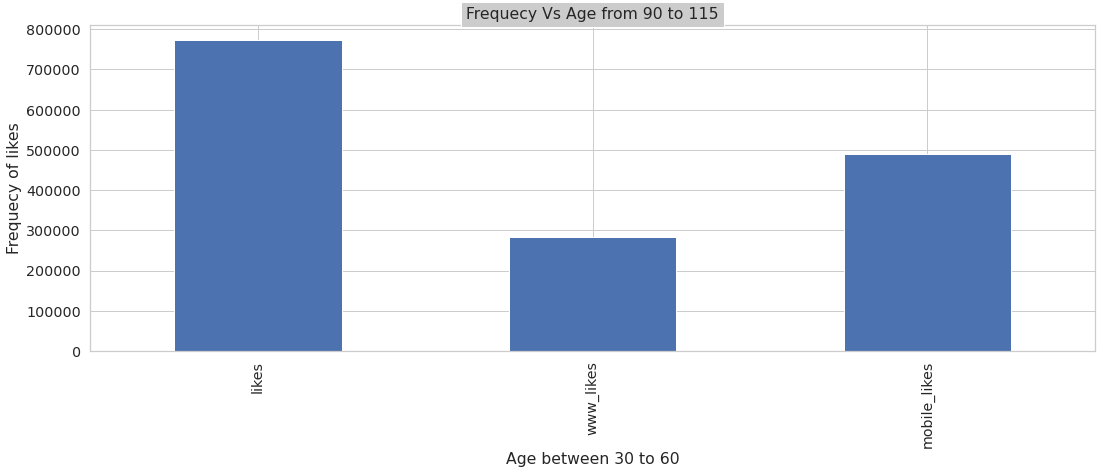

In [41]:
#Plot showing likes,www_likes and mobile_likes compared to age group greater then 90 years of age
plt.figure(figsize=(18,6))
sum_of_likes3=df_fb.loc[(df_fb['age']>=90) & (df_fb['age']<115)][['likes','www_likes','mobile_likes']].sum().plot(kind='bar')
plt.xlabel("Age between 30 to 60")
plt.ylabel("Frequecy of likes")
plt.title("Frequecy Vs Age from 90 to 115",bbox={'facecolor':'0.8', 'pad':5})
sum_of_likes_3=df_fb.loc[(df_fb['age']>=90) & (df_fb['age']<115)][['likes','www_likes','mobile_likes']].sum()
print("Total number of likes ,www_likes and mobile_likes of age group 90 to 115 are as under:")
print()
print(sum_of_likes_3)

In [42]:
print("the total of likes,www_likes,mobile likes btween age from 0 to 30 is",sum_of_likes_0['likes']+sum_of_likes_0['www_likes']+sum_of_likes_0['mobile_likes'])

the total of likes,www_likes,mobile likes btween age from 0 to 30 is 17167755


In [43]:
print("the total of likes,www_likes,mobile likes btween age from 30 to 60 is",sum_of_likes_1['likes']+sum_of_likes_1['www_likes']+sum_of_likes_1['mobile_likes'])

the total of likes,www_likes,mobile likes btween age from 30 to 60 is 9008217


In [44]:
print("the total of likes,www_likes,mobile likes btween age from 60 to 90 is",sum_of_likes_2['likes']+sum_of_likes_2['www_likes']+sum_of_likes_2['mobile_likes'])

the total of likes,www_likes,mobile likes btween age from 60 to 90 is 3183086


In [45]:
print("the total of likes,www_likes,mobile likes mor then 90 years of age is",sum_of_likes_3['likes']+sum_of_likes_3['www_likes']+sum_of_likes_3['mobile_likes'])

the total of likes,www_likes,mobile likes mor then 90 years of age is 1545216


# Observations


1.   the total of likes,www_likes,mobile likes btween age from 0 to 30 is 17166865
2.  the total of likes,www_likes,mobile likes btween age from 30 to 60 is 8984264
3. the total of likes,www_likes,mobile likes btween age from 60 to 90 is 3175940
4.   the total of likes,www_likes,mobile likes mor then 90 years of age is 1528728



*   We conclude that the age group between 0 to 30 has more likes,www_likes and mobile_likes ad comapred to other groups also we conclude that the mobile_likes are more as comapred to www_likes withing all age groups










**pivot graph showing mobile_likes ,www_likes Vs age**

Text(0.5, 1.0, 'Frequecy of likes,www_likes,mobile_likes as per group of ages')

<Figure size 1296x648 with 0 Axes>

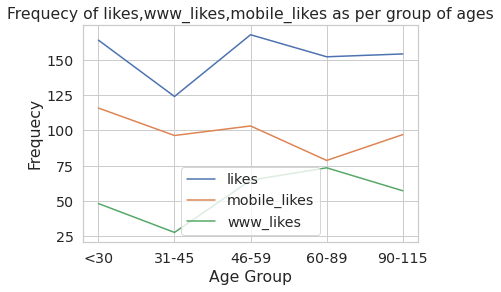

In [46]:
# pivot plot showing number of likes,www_likes and mobile_likes within all age groups
plt.figure(figsize=(18,9))
df_fb.pivot_table(values=['mobile_likes','likes','www_likes'],index='age1',observed=True,margins_name='likes').plot()
plt.xlabel("Age Group")
plt.ylabel("Frequecy")
plt.title("Frequecy of likes,www_likes,mobile_likes as per group of ages")

In [47]:
print("therefore on analyzing the likes between age group less then 30 to greater then 90 we can see that there is drop of  ({:.2f}%) ".format(sum_of_likes_0['likes']/sum_of_likes_3['likes']))

therefore on analyzing the likes between age group less then 30 to greater then 90 we can see that there is drop of  (11.11%) 


In [48]:
#some percentage calculation
print(sum_of_likes_0/sum_of_likes_3)


likes           11.110264
www_likes       8.980622 
mobile_likes    12.336614
dtype: float64


In [49]:
print("therefore on analyzing the www_likes between age group less then 30 to greater then 90 we can see that there is drop of  ({:.2f}%)".format(sum_of_likes_0['www_likes']/sum_of_likes_3['www_likes']))
print("therefore on analyzing the mobile_likes between age group less then 30 to greater then 90 we can see that there is drop of  ({:.2f}%)".format(round(sum_of_likes_0['mobile_likes']/sum_of_likes_3['mobile_likes'])))

therefore on analyzing the www_likes between age group less then 30 to greater then 90 we can see that there is drop of  (8.98%)
therefore on analyzing the mobile_likes between age group less then 30 to greater then 90 we can see that there is drop of  (12.00%)


In [50]:
print("therefore on analyzing the likes between 30 -60 age group and between 60-90 age group we can see drop of   ({:.2f}%)".format(sum_of_likes_1['likes']/sum_of_likes_2['likes']))
print("therefore on analyzing the www_likes between 30 -60 age group and between 60-90 age group we can see drop of ({:.2f}%)".format(sum_of_likes_1['www_likes']/sum_of_likes_2['www_likes']))
print("therefore on analyzing the mobile_likes between 30 -60 age group and between 60-90 age group we can see drop of  ({:.2f}%)".format(sum_of_likes_1['mobile_likes']/sum_of_likes_2['mobile_likes']))

therefore on analyzing the likes between 30 -60 age group and between 60-90 age group we can see drop of   (2.83%)
therefore on analyzing the www_likes between 30 -60 age group and between 60-90 age group we can see drop of (1.74%)
therefore on analyzing the mobile_likes between 30 -60 age group and between 60-90 age group we can see drop of  (3.87%)


**5.6 Age Vs Gender**

Text(0.5, 1.0, 'age vs gender')

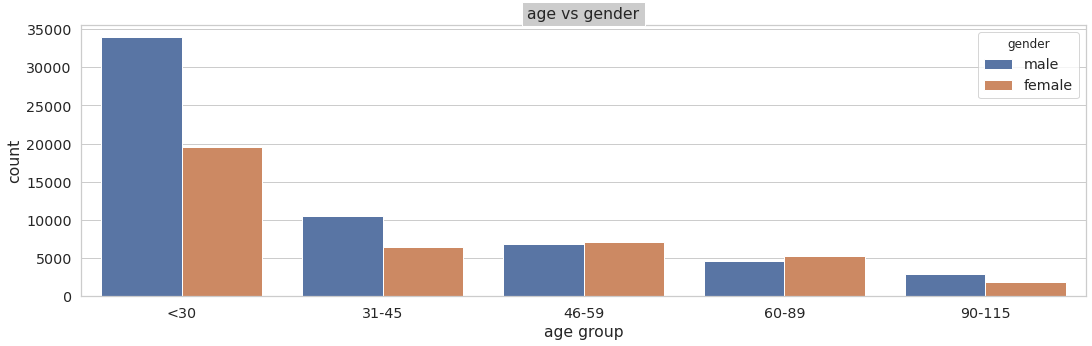

In [51]:
# count plot showing number of females and males age group wise
plt.figure(figsize=(18,5))
sns.countplot(data=df_fb,x='age1',hue='gender')
plt.xlabel("age group")
plt.ylabel("count")
plt.title("age vs gender",bbox={'facecolor':'0.8', 'pad':5})

**5.7 mobile_likes Vs Age**

Text(0.5, 1.0, 'mobile_likes Vs Gender')

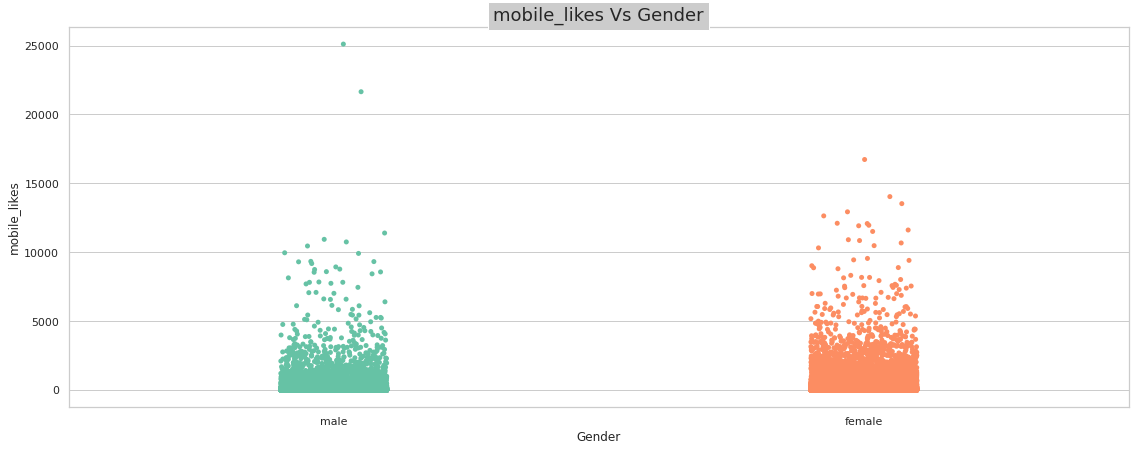

In [52]:
#Plot showing the density of mobile_likes in comparision to gender
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(19,7))
ax=sns.stripplot(y='mobile_likes' ,x='gender',data=df_fb,palette='Set2',color='matplotlib')
plt.xlabel("Gender")
plt.ylabel("mobile_likes")
plt.title("mobile_likes Vs Gender",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

**5.8 www_likes Vs Gender**

Text(0.5, 1.0, 'likes Vs Gender')

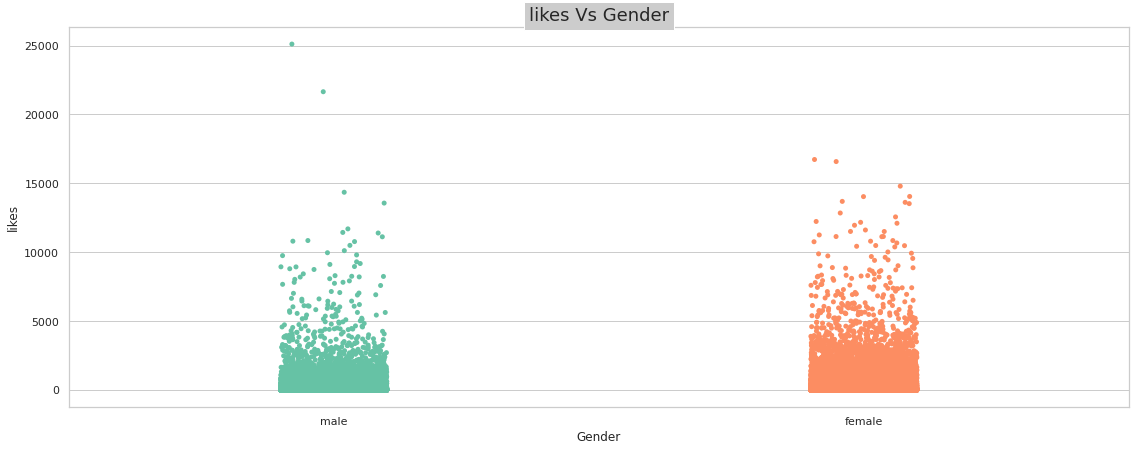

In [53]:
#Plot showing the density of likes in comparision to gender
plt.figure(figsize=(19,7))
ax=sns.stripplot(y='likes' ,x='gender',data=df_fb,palette='Set2',color='matplotlib')
plt.xlabel("Gender")
plt.ylabel("likes")
plt.title("likes Vs Gender",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

**5.9 www_likes Vs Gender**

Text(0.5, 1.0, 'www_likes Vs Gender')

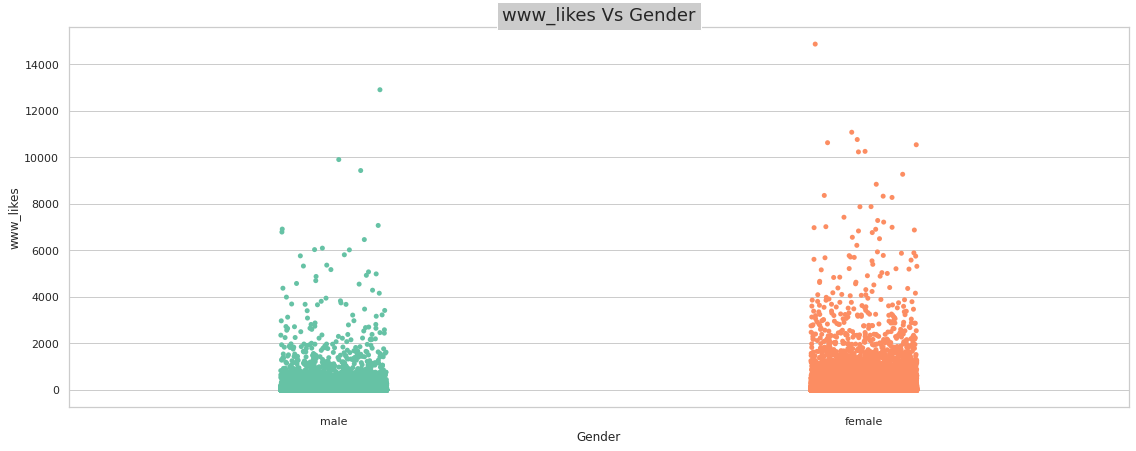

In [54]:
#Plot showing the density of www_likes in comparision to gender
plt.figure(figsize=(19,7))
ax=sns.stripplot(y='www_likes' ,x='gender',data=df_fb,palette='Set2',color='matplotlib')
plt.xlabel("Gender")
plt.ylabel("www_likes")
plt.title("www_likes Vs Gender",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

**5.11 pivot table likes,mobile,www Vs Gender**

Text(0.5, 1.0, 'Frequecy of likes,www_likes,mobile_likes as per group of ages')

<Figure size 1296x648 with 0 Axes>

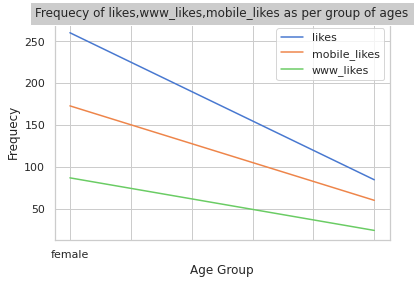

In [55]:
plt.figure(figsize=(18,9))
df_fb.pivot_table(values=['mobile_likes','likes','www_likes'],index='gender').plot()
plt.xlabel("Age Group")
plt.ylabel("Frequecy")

plt.title("Frequecy of likes,www_likes,mobile_likes as per group of ages",bbox={'facecolor':'0.8', 'pad':5})

**6. Some Validations** 

Total number of likes ,www_likes and mobile_likes of Gender(Male) with Age less then 60 Years are as under:

likes           4105261
www_likes       1071425
mobile_likes    3033834
dtype: int64


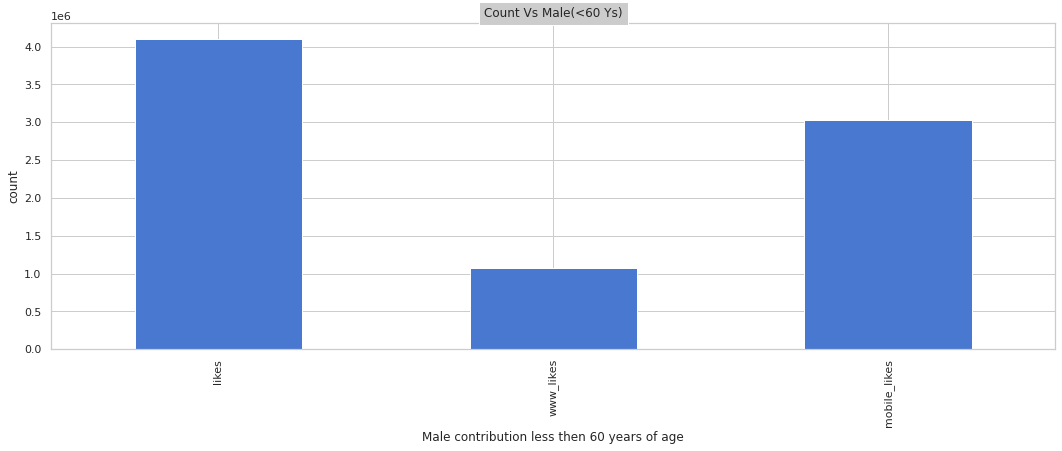

In [56]:
# contribution of likes ,www_likes ,mobile_likes when the gender is male and age less then 60 years of age
plt.figure(figsize=(18,6))
df_fb.loc[(df_fb['gender']=='male') & (df_fb['age']<60) ][['likes','www_likes','mobile_likes']].sum().plot(kind='bar')
plt.xlabel("Male contribution less then 60 years of age")
plt.ylabel("count")
plt.title("Count Vs Male(<60 Ys)",bbox={'facecolor':'0.8', 'pad':5})
male_less_60=df_fb.loc[(df_fb['gender']=='male') & (df_fb['age']<60) ][['likes','www_likes','mobile_likes']].sum()
print("Total number of likes ,www_likes and mobile_likes of Gender(Male) with Age less then 60 Years are as under:")
print()
print(male_less_60)



**6.1 likes,mobile_likes and www_likes Vs Age Vs Gender**

Total number of likes ,www_likes and mobile_likes of Gender(Female) with Age less then 60 Years are as under:

likes           8982728
www_likes       2816232
mobile_likes    6166492
dtype: int64


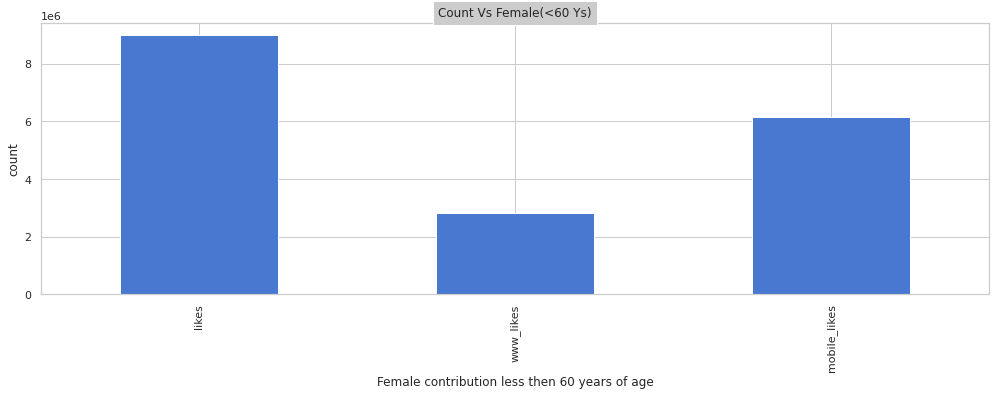

In [57]:
# contribution of likes ,www_likes ,mobile_likes when the gender is female and age less then 60 years of age
plt.figure(figsize=(17,5))
df_fb.loc[(df_fb['gender']=='female') & (df_fb['age']<60) ][['likes','www_likes','mobile_likes']].sum().plot(kind='bar')
plt.xlabel("Female contribution less then 60 years of age")
plt.ylabel("count")
plt.title("Count Vs Female(<60 Ys)",bbox={'facecolor':'0.8', 'pad':5})
female_less_60=df_fb.loc[(df_fb['gender']=='female') & (df_fb['age']<60) ][['likes','www_likes','mobile_likes']].sum()
print("Total number of likes ,www_likes and mobile_likes of Gender(Female) with Age less then 60 Years are as under:")
print()
print(female_less_60)

Total number of likes ,www_likes and mobile_likes of Gender(Male) with Age more then 60 Years are as under:

likes           858664
www_likes       356255
mobile_likes    502409
dtype: int64


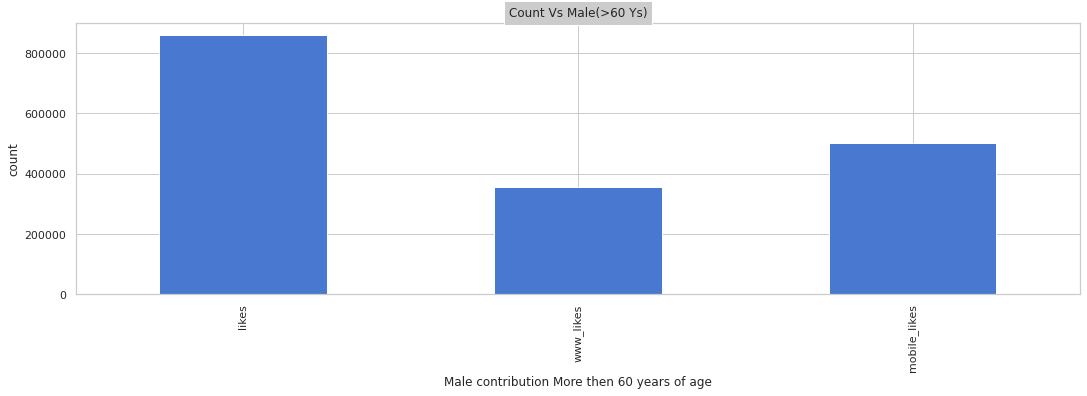

In [58]:
# contribution of likes ,www_likes ,mobile_likes when the gender is male and age greater then 60 years of age
plt.figure(figsize=(18,5))
df_fb.loc[(df_fb['gender']=='male') & (df_fb['age']>60) ][['likes','www_likes','mobile_likes']].sum().plot(kind='bar')
plt.xlabel("Male contribution More then 60 years of age")
plt.ylabel("count")
plt.title("Count Vs Male(>60 Ys)",bbox={'facecolor':'0.8', 'pad':5})
male_gre_60=df_fb.loc[(df_fb['gender']=='male') & (df_fb['age']>60) ][['likes','www_likes','mobile_likes']].sum()
print("Total number of likes ,www_likes and mobile_likes of Gender(Male) with Age more then 60 Years are as under:")
print()
print(male_gre_60)

Total number of likes ,www_likes and mobile_likes of Gender(Male) with Age more then 60 Years are as under:

likes           1407846
www_likes       653422 
mobile_likes    754424 
dtype: int64


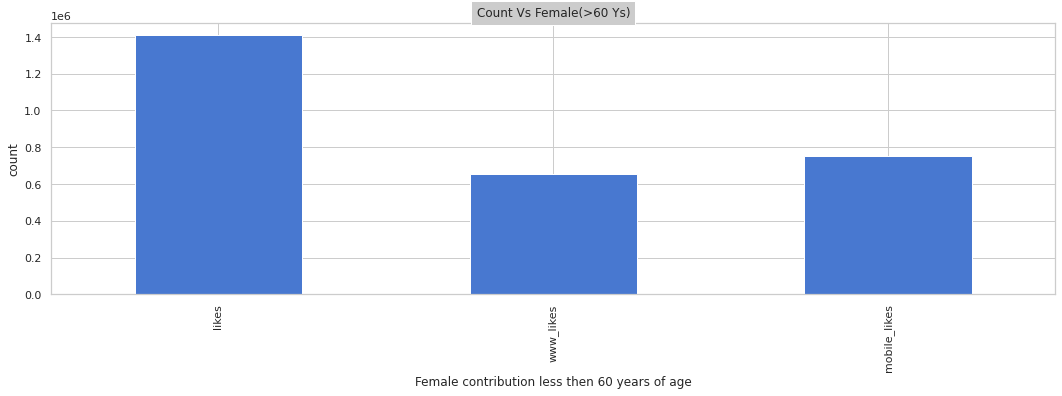

In [59]:
# contribution of likes ,www_likes ,mobile_likes when the gender is female and age greater then 60 years of age
plt.figure(figsize=(18,5))
df_fb.loc[(df_fb['gender']=='female') & (df_fb['age']>60) ][['likes','www_likes','mobile_likes']].sum().plot(kind='bar')
plt.xlabel("Female contribution less then 60 years of age")
plt.ylabel("count")
plt.title("Count Vs Female(>60 Ys)",bbox={'facecolor':'0.8', 'pad':5})
female_gre_60=df_fb.loc[(df_fb['gender']=='female') & (df_fb['age']>60) ][['likes','www_likes','mobile_likes']].sum()
print("Total number of likes ,www_likes and mobile_likes of Gender(Male) with Age more then 60 Years are as under:")
print()
print(female_gre_60)

In [60]:
# to count totoal number of likes ,www_likes and mobile_likes in both male and female with gretaer then 60 years of age and also less then 60 years of age
total_male_l_60=male_less_60['likes']+male_less_60['www_likes']+male_less_60['mobile_likes']
total_female_l_60=female_less_60['likes']+female_less_60['www_likes']+female_less_60['mobile_likes']
total_male_gre_60=male_gre_60['likes']+male_gre_60['www_likes']+male_gre_60['mobile_likes']
total_female_gr_60=female_gre_60['likes']+female_gre_60['www_likes']+female_gre_60['mobile_likes']
print("The total of likes , mobile_likes and www_likes of Male with age less then 60 is",total_male_l_60)
print("The total of likes , mobile_likes and www_likes of Female with age less then 60 is",total_female_l_60)
print("The total of likes , mobile_likes and www_likes of Male with age gretaer then 60 is",total_male_gre_60)
print("The total of likes , mobile_likes and www_likes of Female with age gretaer  then 60 is",total_female_gr_60)

The total of likes , mobile_likes and www_likes of Male with age less then 60 is 8210520
The total of likes , mobile_likes and www_likes of Female with age less then 60 is 17965452
The total of likes , mobile_likes and www_likes of Male with age gretaer then 60 is 1717328
The total of likes , mobile_likes and www_likes of Female with age gretaer  then 60 is 2815692


In [61]:
print("On above analysis we found that ({:.2f}%)  female gets more likes,www_likes,mobile_likes as compared to male when age froup taken into consideration is less then 60 years of age" .format(round(total_female_l_60/total_male_l_60)))

On above analysis we found that (2.00%)  female gets more likes,www_likes,mobile_likes as compared to male when age froup taken into consideration is less then 60 years of age


In [62]:
print("On above analysis we found that ({:.2f}%) female gets more likes,www_likes,mobile_likes as compared to male when age froup taken into consideration is less then 60 years of age" .format(round(total_female_gr_60/total_male_gre_60)))

On above analysis we found that (2.00%) female gets more likes,www_likes,mobile_likes as compared to male when age froup taken into consideration is less then 60 years of age


In [63]:
df_fb.groupby('gender')['likes','www_likes','mobile_likes'].sum()

,likes,www_likes,mobile_likes
gender,,,
female,10467978,3507554,6960420
male,4984162,1438765,3545395


In [64]:
# On the basis of above graph we can see theat female has more likes ,www_likes and mobile_likes as comapared to male

In [65]:
print("The data shows the likes ,www_likes and mobile_likes in female with age group less then 60 :-"
,female_less_60)
print("The data shows the likes ,www_likes and mobile_likes in female with age group greater then 60 :-" ,female_gre_60)


The data shows the likes ,www_likes and mobile_likes in female with age group less then 60 :- likes           8982728
www_likes       2816232
mobile_likes    6166492
dtype: int64
The data shows the likes ,www_likes and mobile_likes in female with age group greater then 60 :- likes           1407846
www_likes       653422 
mobile_likes    754424 
dtype: int64


#Observations
Female with less then 60 years of age get more likes,www_likes and mobile_likes with more then 60 years of age



#Data Cleaning
Now will take tenure into consideration and will convert into bins

In [66]:
# convert maximim tenure user into the years span
df_fb['tenure'].max()/365


8.6

In [67]:
# will convert tenure into Number oF years in FB by divifing into bins
df_fb['Tenure_In_Yrs'] = pd.cut(df_fb['tenure'],bins=np.arange(0,3300,365)
                     , labels=['0-1 Yrs','1-2 Yrs','2-3 Yrs','3-4 Yrs','4-5 Yrs','5-6 Yrs','6-7 Yrs','7-8 Yrs','8-9 Yrs'], include_lowest=True,right=True)

In [68]:
df_fb.head()                  # to get some insight of data set

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age1,Tenure_In_Yrs
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,<30,0-1 Yrs
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,<30,0-1 Yrs
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,<30,0-1 Yrs
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,<30,0-1 Yrs
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,<30,0-1 Yrs


In [69]:
# count of tenure in years 
df_fb['Tenure_In_Yrs'].value_counts()

0-1 Yrs    43658
1-2 Yrs    33366
2-3 Yrs    9860 
3-4 Yrs    5448 
4-5 Yrs    4557 
5-6 Yrs    1507 
6-7 Yrs    581  
7-8 Yrs    15   
8-9 Yrs    9    
Name: Tenure_In_Yrs, dtype: int64

**6.2 Tenure Vs Gender**

Text(0.5, 1.0, 'Tenure vs gender')

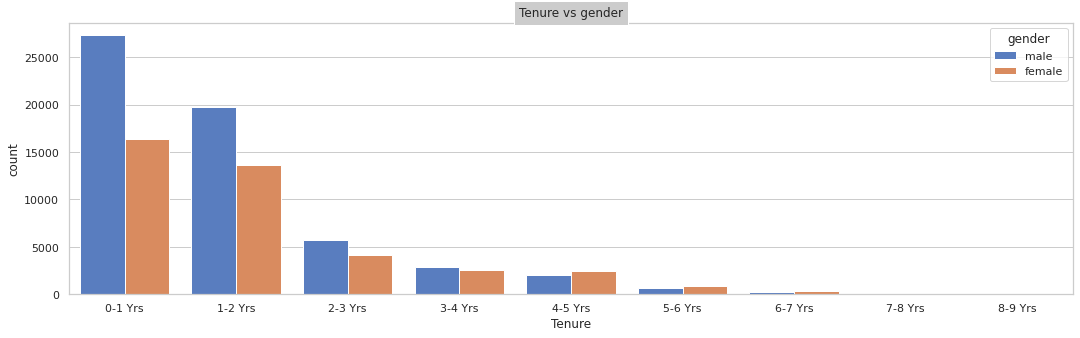

In [70]:
# count plot shwoing tenure comapred to gender
plt.figure(figsize=(18,5))
sns.countplot(data=df_fb,x='Tenure_In_Yrs',hue='gender')
plt.xlabel("Tenure")
plt.ylabel("count")
plt.title("Tenure vs gender",bbox={'facecolor':'0.8', 'pad':5})

In [71]:
#Tenure less then 4 years of age as comapred with gender
Tenure_male=df_fb.loc[(df_fb['tenure']<1460) & (df_fb['gender']=='male')].shape[0]
Tenure_female=df_fb.loc[(df_fb['tenure']<1460) & (df_fb['gender']=='female')].shape[0]
print("Total number of male users with less then 4 years Tenure is  =", Tenure_male)
print("Total number of female users with less then 4 years Tenure is  =" ,Tenure_female)


Total number of male users with less then 4 years Tenure is  = 55697
Total number of female users with less then 4 years Tenure is  = 36614


In [72]:
#Tenure more then 4 years of age as comapred with gender
Tenure_male1=df_fb.loc[(df_fb['tenure']>=1460) & (df_fb['gender']=='male')].shape[0]
Tenure_female1=df_fb.loc[(df_fb['tenure']>=1460) & (df_fb['gender']=='female')].shape[0]
print("Total number of female users with Tenure  equal to greater then 4 years   is = ",Tenure_female1)
print("Total number of male users with  Tenure  equal to greater then 4 years   is  = ",Tenure_male1)

Total number of female users with Tenure  equal to greater then 4 years   is =  3638
Total number of male users with  Tenure  equal to greater then 4 years   is  =  3052


#Observations
The above stats shows that the female are more then male when the tenure is comapred which is more then 4 years if compared less then 4 years then male are more as compared to female

will compare the friend request received and freiend count with gender and tenure also can with age group

In [73]:
df_fb.head(2)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age1,Tenure_In_Yrs
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,<30,0-1 Yrs
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,<30,0-1 Yrs


**6.3 Friend_Count,friendships_initated Vs Gender**

In [74]:
# count of friend_count,friendships_initiated compared to gender
df_fb.groupby('gender')['Tenure_In_Yrs','friend_count','friendships_initiated'].sum().sort_values(ascending=True,by='gender')

,friend_count,friendships_initiated
gender,,
female,9740073,4584801
male,9699059,6053223


In [75]:
df1=df_fb.loc[(df_fb['tenure']<1460) & (df_fb['gender']=='male')]
df2=df_fb.loc[(df_fb['tenure']<1460) & (df_fb['gender']=='female')]
df3=df_fb.loc[(df_fb['tenure']>=1460) & (df_fb['gender']=='male')]
df4=df_fb.loc[(df_fb['tenure']>=1460) & (df_fb['gender']=='female')]
print(df1)

        userid  age  dob_day  dob_year  dob_month gender  tenure  \
0      2094382  14   19       1999      11         male   266.0    
2      2083884  14   16       1999      11         male   13.0     
4      1733186  14   4        1999      12         male   82.0     
5      1524765  14   1        1999      12         male   15.0     
6      1136133  13   14       2000      1          male   12.0     
...        ...  ..   ..        ...     ..           ...    ...     
98975  1749991  107  29       1906      12         male   328.0    
98985  1299870  18   16       1995      8          male   894.0    
98988  1729341  21   20       1992      10         male   587.0    
98990  1902600  58   11       1955      3          male   399.0    
98993  1654565  19   15       1994      8          male   394.0    

       friend_count  friendships_initiated  likes  likes_received  \
0      0             0                      0      0                
2      0             0                      0

In [76]:
print("There are total {}  friends and total {} friendships_initiated  by Male who is with facebook for tenure of less then 4 years ".format(df1['friend_count'].sum(),df1['friendships_initiated'].sum()))
print("There are total {}  friends and total {} friendships_initiated  by Female who is with facebook for tenure of less then 4 years ".format(df2['friend_count'].sum(),df2['friendships_initiated'].sum()))
print("There are total {}  friends and total {} friendships_initiated  by Male who is with facebook for tenure of 4 years or greater then ".format(df3['friend_count'].sum(),df3['friendships_initiated'].sum()))
print("There are total {}  friends and total {} friendships_initiated  by Female who is with facebook for tenure of 4 years or greater then ".format(df4['friend_count'].sum(),df4['friendships_initiated'].sum()))

There are total 8855141  friends and total 5651816 friendships_initiated  by Male who is with facebook for tenure of less then 4 years 
There are total 8643738  friends and total 4099811 friendships_initiated  by Female who is with facebook for tenure of less then 4 years 
There are total 843918  friends and total 401407 friendships_initiated  by Male who is with facebook for tenure of 4 years or greater then 
There are total 1096335  friends and total 484990 friendships_initiated  by Female who is with facebook for tenure of 4 years or greater then 


In [77]:
total_count=df1['friend_count'].sum()-df3['friend_count'].sum()
total_count_1=df1['friendships_initiated'].sum()-df3['friendships_initiated'].sum()
total_count_2=df2['friend_count'].sum()-df4['friend_count'].sum()
total_count_3=df2['friendships_initiated'].sum()-df4['friendships_initiated'].sum()
print("Decrease in friend count in male from tenure more then 4 years to less then 4 years is {}".format(total_count))
print("Decrease in friendships_initiated count in male from tenure more then 4 years to less then 4 years is {}".format(total_count_1))
print("Decrease in friend count in female from tenure more then 4 years to less then 4 years is {}".format(total_count_2))
print("Decrease in friendships_initiated count in male from tenure more then 4 years to less then 4 years is {}".format(total_count_3))

Decrease in friend count in male from tenure more then 4 years to less then 4 years is 8011223
Decrease in friendships_initiated count in male from tenure more then 4 years to less then 4 years is 5250409
Decrease in friend count in female from tenure more then 4 years to less then 4 years is 7547403
Decrease in friendships_initiated count in male from tenure more then 4 years to less then 4 years is 3614821


#Observations
this clearly shows that female are more active on facebook as compared to male with tenure of more then 4 years or equal 

Text(0.5, 1.0, 'Frequecy Vs Tenure Less 4 Years (Male)')

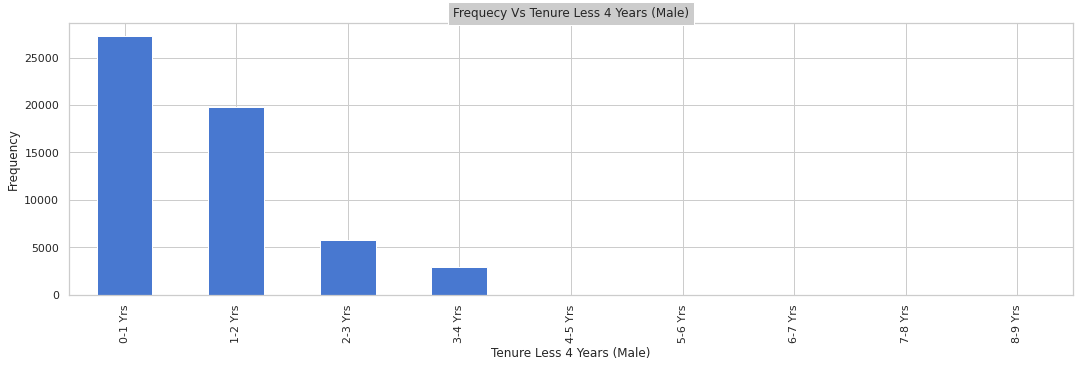

In [78]:
# showing tenure of male with less then 4years
plt.figure(figsize=(18,5))
df1.groupby('Tenure_In_Yrs')['gender'].count().plot(kind='bar')
plt.xlabel('Tenure Less 4 Years (Male)')
plt.ylabel('Frequency')
plt.title("Frequecy Vs Tenure Less 4 Years (Male)",bbox={'facecolor':'0.8', 'pad':5})

Text(0.5, 1.0, 'Frequecy Vs Tenure Less 4 Years (Female)')

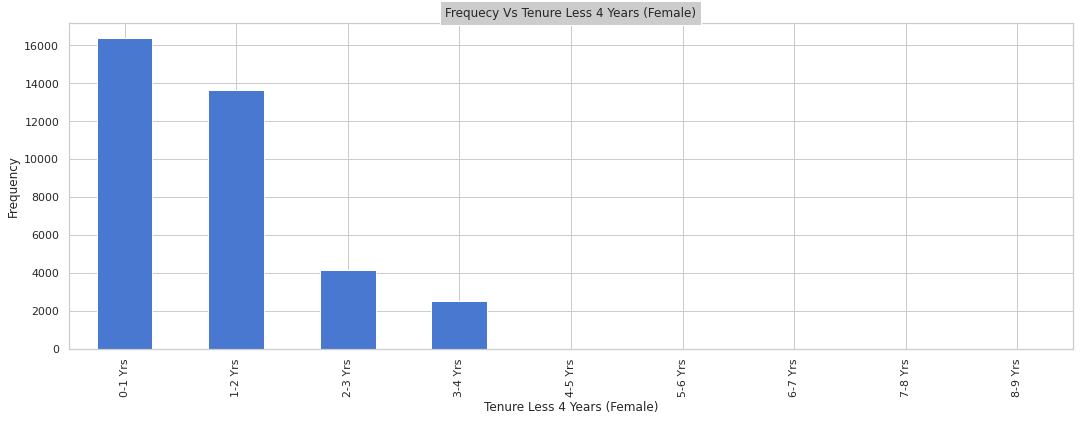

In [79]:
# showing tenure of female with less then 4years
plt.figure(figsize=(18,6))
df2.groupby('Tenure_In_Yrs')['gender'].count().plot(kind='bar')
plt.xlabel('Tenure Less 4 Years (Female)')
plt.ylabel('Frequency')

plt.title("Frequecy Vs Tenure Less 4 Years (Female)",bbox={'facecolor':'0.8', 'pad':5})

Text(0.5, 1.0, 'Frequecy Vs Tenure Greater 4 Years (Male)')

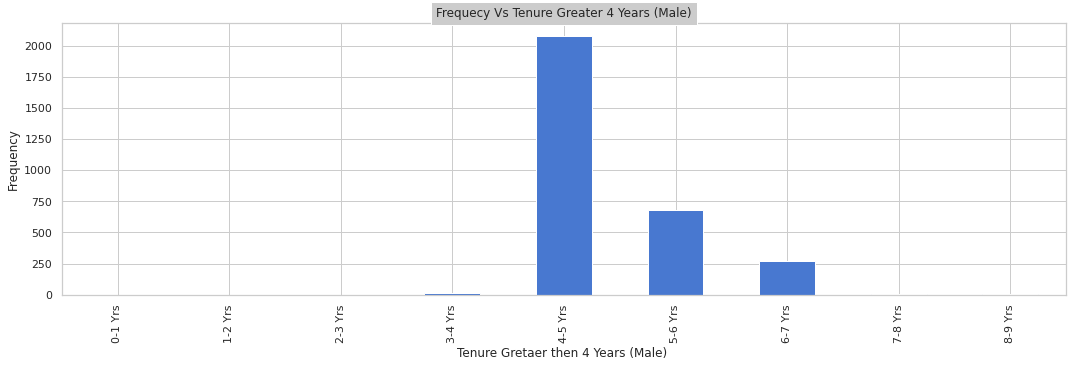

In [80]:
# showing tenure of male with greater then 4years
plt.figure(figsize=(18,5))
df3.groupby('Tenure_In_Yrs')['gender'].count().plot(kind='bar')
plt.xlabel('Tenure Gretaer then 4 Years (Male) ')
plt.ylabel('Frequency')
plt.title("Frequecy Vs Tenure Greater 4 Years (Male)",bbox={'facecolor':'0.8', 'pad':5})

Text(0.5, 1.0, 'Frequecy Vs Tenure Less 4 Years (Female)')

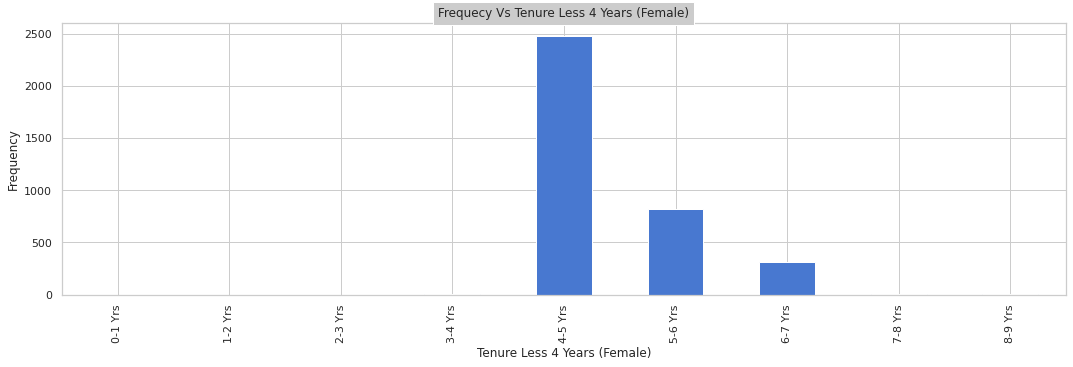

In [81]:
# showing tenure of female with greater then 4years
plt.figure(figsize=(18,5))
df4.groupby('Tenure_In_Yrs')['gender'].count().plot(kind='bar')
plt.xlabel('Tenure Less 4 Years (Female)')
plt.ylabel('Frequency')
plt.title("Frequecy Vs Tenure Less 4 Years (Female)",bbox={'facecolor':'0.8', 'pad':5})

Observations
from above graphs we can see that the male are more with tenure less then 4 years in 0-1 age group  and with tenure more then 4 years female are more as 4-5 age group

In [82]:
# count of friend_count,friendships_initiated compared wiht gender
df_fb.groupby('gender')['Tenure_In_Yrs','friend_count','friendships_initiated'].sum().sort_values(ascending=True,by='gender')

,friend_count,friendships_initiated
gender,,
female,9740073,4584801
male,9699059,6053223


Text(0.5, 1.0, 'Frequecy of friend_count,friendships_initiated Gender')

<Figure size 1296x648 with 0 Axes>

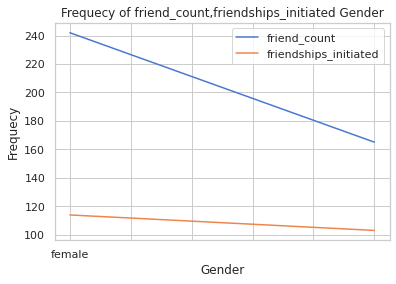

In [83]:
# plot showing friendships_initiated,friend_count compared with gender
plt.figure(figsize=(18,9))
df_fb.pivot_table(values=['friend_count','friendships_initiated'],index='gender',observed=True,margins_name='likes').plot()
plt.xlabel("Gender")
plt.ylabel("Frequecy")
plt.title("Frequecy of friend_count,friendships_initiated Gender")

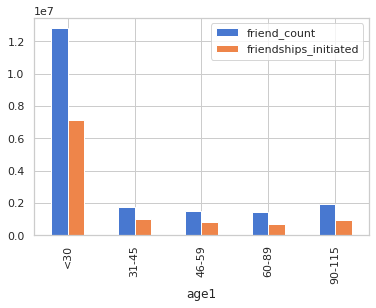

In [84]:
# plot showing friendships_initiated,friend_count compared with age
df_fb.groupby('age1')['Tenure_In_Yrs','friend_count','friendships_initiated'].sum().sort_values(ascending=True,by='age1').plot(kind='bar')

**6.5 Friend_Count,friendships_initated Vs Age**

In [85]:
#count of friend_count,friendships_initiated compared with age
df_fb.groupby('age1')['Tenure_In_Yrs','friend_count','friendships_initiated'].sum().sort_values(ascending=True,by='age1')

,friend_count,friendships_initiated
age1,,
<30,12801941,7126367
31-45,1760574,1025803
46-59,1519529,843883
60-89,1429959,713432
90-115,1927129,928539


#Observations
this shows that users with age group less then 30 has more friend_count,friendships_initiated and female has more firend_count and friendships_initated 

In [86]:
# sort by likes recieved
df_fb.sort_values(by='likes_received',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age1,Tenure_In_Yrs
94906,1674584,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,<30,1-2 Yrs
77121,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,<30,0-1 Yrs
98822,1715925,23,4,1990,9,female,705.0,4077,793,1877,152014,80,89911,1797,62103,<30,1-2 Yrs
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,<30,1-2 Yrs
98878,1053087,23,6,1990,6,male,596.0,4320,836,2996,82623,179,43410,2817,39213,<30,1-2 Yrs
49230,1432020,20,12,1993,1,male,245.0,79,50,477,53534,78,30387,399,23147,<30,0-1 Yrs
98773,2042824,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039,<30,0-1 Yrs
98937,1559908,20,4,1993,12,female,1334.0,4622,1819,4280,45633,472,30754,3808,14879,<30,3-4 Yrs
98936,1781243,17,1,1996,5,female,976.0,3683,755,10478,42449,246,27353,10232,15096,<30,2-3 Yrs
98686,1015907,74,27,1939,11,male,832.0,4630,831,966,39536,941,10199,25,29337,60-89,2-3 Yrs


**6.6 Convert into likes_per_day**

In [87]:
# counting the likes received per day 
df_fb['likes_per_day']=round(df_fb.likes/df_fb.tenure.where(df_fb.tenure>0))

In [88]:
df_fb.head(2)                   # viewing the data set

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age1,Tenure_In_Yrs,likes_per_day
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,<30,0-1 Yrs,0.0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,<30,0-1 Yrs,0.0


In [89]:
# data frame with likes per day in descedning order
followes=df_fb.sort_values(ascending=False,by='likes_per_day')[:10]
followes                                                                

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age1,Tenure_In_Yrs,likes_per_day
94057,2175941,18,25,1995,2,male,2.0,640,299,5640,2542,4251,1587,1389,955,<30,0-1 Yrs,2820.0
94996,1149300,24,7,1989,3,female,2.0,834,104,2169,5404,2169,1520,0,3884,<30,0-1 Yrs,1084.0
61145,1409983,47,8,1966,10,female,4.0,123,61,3331,1200,3331,468,0,732,46-59,0-1 Yrs,833.0
69227,1663659,27,2,1986,10,male,37.0,164,54,11396,8534,11396,6599,0,1935,<30,0-1 Yrs,308.0
75126,1546811,39,11,1974,12,female,29.0,212,145,8091,6730,3181,2457,4910,4273,31-45,0-1 Yrs,279.0
79093,1411625,17,8,1996,9,male,33.0,250,190,7018,4892,7018,4744,0,148,<30,0-1 Yrs,213.0
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,<30,0-1 Yrs,210.0
66231,1523193,16,6,1997,1,male,11.0,150,70,2121,425,2121,391,0,34,<30,0-1 Yrs,193.0
79073,1038038,21,5,1992,5,female,12.0,242,238,2194,1214,237,657,1957,557,<30,0-1 Yrs,183.0
84115,1597681,33,28,1980,7,female,38.0,319,113,6907,4600,0,1843,6907,2757,31-45,0-1 Yrs,182.0


**6.7 userid Vs likes per day**

<Figure size 1224x360 with 0 Axes>

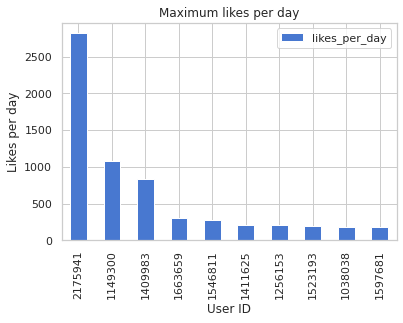

In [90]:
# user id vs maximim likes
plt.figure(figsize=(17,5))
followes.plot(x='userid',y='likes_per_day',kind='bar')
plt.ylabel("Likes per day")
plt.xlabel("User ID")
plt.title("Maximum likes per day")
plt.show()

will compare likes per day with the gender and age group and will see the comparision of all

In [91]:
#count of likes per day gender wise
followes.groupby('gender')['likes_per_day'].sum()

gender
female    2771.0
male      3534.0
Name: likes_per_day, dtype: float64

**6.8 likes  Vs Gender**

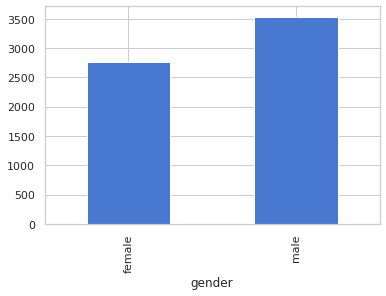

In [92]:
# shwoing likes per day on graph with gender as other coordinate
followes.groupby('gender')['likes_per_day'].sum().plot(kind='bar')

Text(0.5, 1.0, 'likes_per_day Vs Gender')

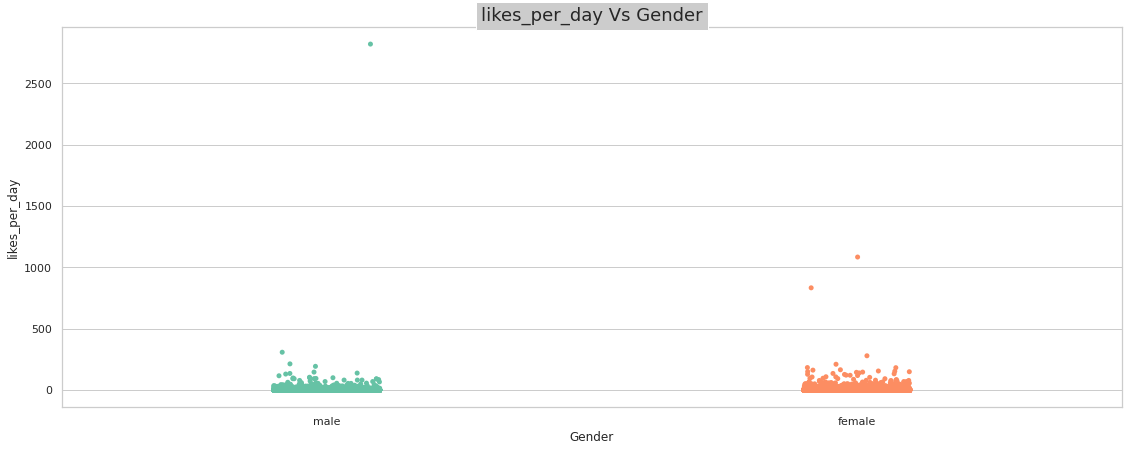

In [93]:
# shwoing likes per day on graph with gender as other coordinate
plt.figure(figsize=(19,7))
ax=sns.stripplot(y='likes_per_day' ,x='gender',data=df_fb,palette='Set2',color='matplotlib')
plt.xlabel("Gender")
plt.ylabel("likes_per_day")
plt.title("likes_per_day Vs Gender",fontsize=18,bbox={'facecolor':'0.8', 'pad':5})

Text(0.5, 1.0, 'likes Vs Gender')

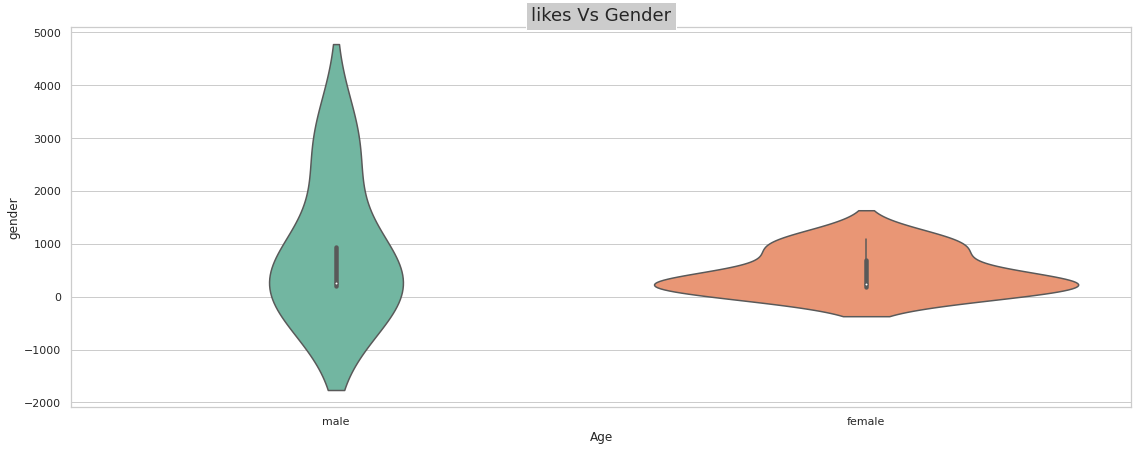

In [94]:
# shwoing likes per day on graph with gender as other coordinate
plt.figure(figsize=(19,7))
ax=sns.violinplot(y='likes_per_day' ,x='gender',gridsize=100,data=followes,palette='Set2',color='matplotlib')
plt.xlabel("Age")
plt.ylabel("gender")
plt.title("likes Vs Gender",fontsize=18, bbox={'facecolor':'0.8', 'pad':5})

#Observations
this shows that male has more number of friendship initated per day

In [95]:
# count showing likes per day age wise
df_fb.groupby('age1')['likes_per_day'].count()

age1
<30       53341
31-45     16885
46-59     13884
60-89     9917 
90-115    4904 
Name: likes_per_day, dtype: int64

**6.9 likes Vs age group**

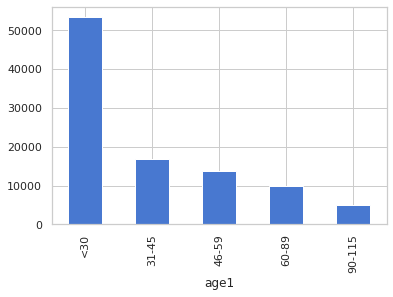

In [96]:
#plot showing likes per day age wise
df_fb.groupby('age1')['likes_per_day'].count().plot(kind='bar')

#Observations
This shows that the age group less then 30 years of age initate more likes per day

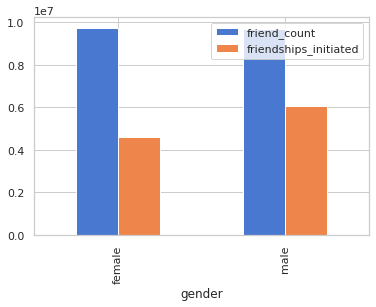

In [97]:
#comaprision of friend_count,friendships_initiated gender wise
df_fb.groupby('gender')['Tenure_In_Yrs','friend_count','friendships_initiated'].sum().sort_values(ascending=True,by='gender').plot(kind='bar')

In [98]:
male_fr_count=df_fb.loc[df_fb['gender']=='male']['friend_count'].sum()
female_fr_count=df_fb.loc[df_fb['gender']=='female']['friend_count'].sum()
print("Total Number of friend count by male is ",male_fr_count)
print("Total Number of firned count by female is ",female_fr_count)

Total Number of friend count by male is  9699059
Total Number of firned count by female is  9740073


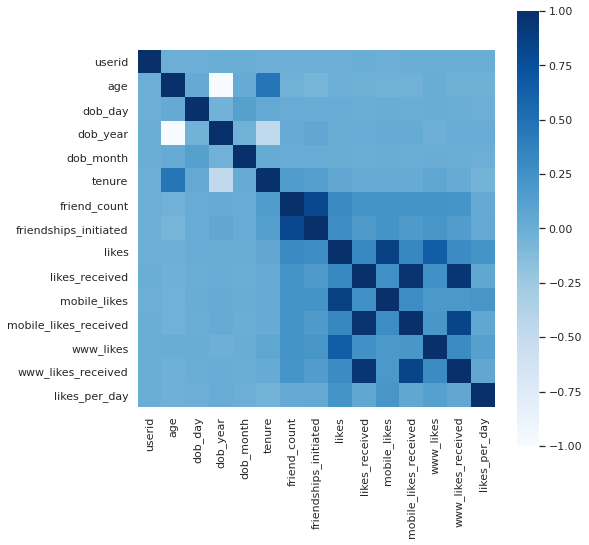

In [99]:
corr=df_fb.corr()['age']
corr[np.argsort(corr,axis=0)[::-1]]
features_correlation = df_fb.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')

# Observation
Suggest that the friend count is more in female as compared to male

In [100]:
male_fr_in_count=df_fb.loc[df_fb['gender']=='male']['friendships_initiated'].sum()
female_fr_in_count=df_fb.loc[df_fb['gender']=='female']['friendships_initiated'].sum()
print("Total Number of friend count by male is ",male_fr_in_count)
print("Total Number of firned count by female is ",female_fr_in_count)

Total Number of friend count by male is  6053223
Total Number of firned count by female is  4584801


#Observations
therefore there is more friend initated by male as compared to female

#Conclusions


1.   The   (Section 5a ,5b) shows that the people having Age between 15 to 25 have more frequecy or more data as compared to other age groups ,also there are user with data in terms of likes,www_likes and mobile_likes whose age is more then 80 years of age as shown in (Section 5.3(Grouping of age group >80 years))

2.   Out of 99001 of records the 5721  is having age greater then 80 years which is around(5.8%)
3.   We conclude that the age group between 0 to 30 has more likes,www_likes and mobile_likes ad comapred to other groups also we conclude that the mobile_likes are more as compared to www_likes within all age groups(Sections 
5.4 likes Vs Age all age groups)

4.   User like to sufe FB more from mobile rather then www in all age groups this pattern is noted.((Sections 5.4 likes Vs Age all age groups)
5.   Female with less then 60 years of age get more likes,www_likes and mobile_likes with more then 60 years of age
6.   Therefore on analyzing the likes between 30 -60 age group and between 60-90 age group we can see drop of   (2.83%)therefore on analyzing the likes between 30 -60 age group and between 60-90 age group we can see drop of   (2.83%)

7.   therefore on analyzing the www_likes between 30 -60 age group and between 60-90 age group we can see drop of (1.74%)
8.   therefore on analyzing the mobile_likes between 30 -60 age group and between 60-90 age group we can see drop of  (3.87%)

9.   The above stats shows that the female are more then male when the tenure is comapred which is more then 4 years if compared less then 4 years then male are more as compared to female
10.   This shows that users with age group less then 30 has more friend_count,friendships_initiated and female has more firend_count and friendships_initated
(Section 6.5 Friend_Count,friendships_initated Vs Age)
11.  This shows that Male has more number of Friendship initated per day
12. This shows that the age group less then 30 years of age initate more likes per day(Section 6.9 likes Vs age group)
13. Therefore there is more friend initated by male as compared to female













##Actionable Insights

1.   We can provide some credits to user who login to FB with www and that can be used for some shopping this will increase the users more on www rather then mobile
2.   WE can also provide some business,promotions ,some news related to interest of person or other ways so that people more then 30 years of age  also surfe more facebok which will ultimately increase the time spent on FB.








